**SETUP**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

print(f"Libraries are loaded successfully!")

Libraries are loaded successfully!


**DATA LOADING**



* **diagnosis.csv**: provides the ICD codes for diagnoses made in the ED upon discharge.
* **edstays.csv**: provides time and location tracking info about ED admissions.
* **medrecon.csv**: provides the names, codes, and chart time of current medications upon admission to the ED.
* **pyxis.csv**: provides the medications dispensed in the ED (name, codes, and chart time).
* **triage.csv**: provides the vitral signs around intime (without actual chart time) to the ED along with self-reported pain level on a scale of 0-10, the assigned acuity using the Emergency Severity Index (ESI) five level traige system, and the chief complaint as a free-text.
*  **vitalsign.csv**: provides the timed vital signs during the ED stay (vitals taken every 1-4 hours) with chart time. also the heart rythm and the self-reported pain level on a scale of 0-10 documented here as free text and may contain on-numeric entries.



In [ ]:
# # Load the ED datasets
# ed_diagnosis_df = pd.read_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/diagnosis.csv')
ed_edstays_df = pd.read_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/edstays.csv')
# ed_medrecon_df = pd.read_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/medrecon.csv')
# # ed_pyxis_df = pd.read_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/pyxis.csv')
# ed_triage_df = pd.read_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/triage.csv')
# # ed_vital_df = pd.read_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/vitalsign.csv')

# print(f"ED diagnosis, edstays, medrecon, pyxis, triage, and vitalsign datasets are loaded successfully!")



---



# Data Description


## Diagnosis.csv Description

There are **6 variables** in the diagnosis.csv:
1. '**subject_id**': a unique identifier of an individual patient.
2. '**stay_id**': a unique identifier of single ED stay for a single patient.
3. '**seq_num**': a psuedo-priority for the diagnosis. a seq_num of 1 usually indicates a "primary" diagnosis.
4. '**icd_code**': a coded diagnosis using ICD ontology.
5. '**icd_version**': the version of the ICD system used, either ICD-9 or ICD-10.
6. '**icd_title**': the textual description of the diagnosis.

In [ ]:
# display ED diagnosis df
print(f"ED diagnosis df shape: {ed_diagnosis_df.shape}")
ed_diagnosis_df.head(3)

ED diagnosis df shape: (899050, 6)


,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION


In [ ]:
# get diagnosis df info
ed_diagnosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899050 entries, 0 to 899049
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   subject_id   899050 non-null  int64 
 1   stay_id      899050 non-null  int64 
 2   seq_num      899050 non-null  int64 
 3   icd_code     899050 non-null  object
 4   icd_version  899050 non-null  int64 
 5   icd_title    899050 non-null  object
dtypes: int64(4), object(2)
memory usage: 41.2+ MB


In [ ]:
# count of missing values in ED diagnosis df
ed_diagnosis_df.isnull().sum()

,0
subject_id,0
stay_id,0
seq_num,0
icd_code,0
icd_version,0
icd_title,0


In [ ]:
# How many unique patients with diagnoses?
ed_diagnosis_df['subject_id'].nunique()

205129

In [ ]:
# How many unique ED stays in diagnosis.csv?
ed_diagnosis_df['stay_id'].nunique()

423989

In [ ]:
# what is the range of ED stays frequency per patient (subject ID)?
ed_diagnosis_df['subject_id'].value_counts().describe()

,count
count,205129.000000
mean,4.382852
std,8.111543
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,600.000000


In [ ]:
# get the number of ED visits per patient.
ed_diagnosis_df['subject_id'].value_counts()

,count
subject_id,
15496609,600
10577647,517
14394983,489
16233333,454
16662316,394
...,...
17583460,1
13516829,1
17583532,1


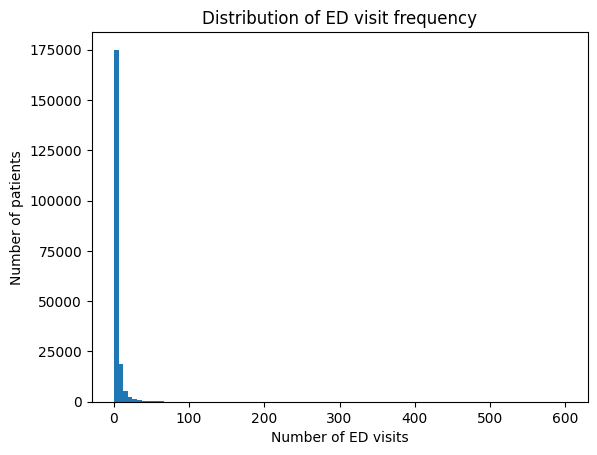

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# visualize the distribution of ED visit frequency and annotate the plot.
ed_diagnosis_df['subject_id'].value_counts().plot(kind='hist', bins=100)
plt.xlabel('Number of ED visits')
plt.ylabel('Number of patients')
plt.title('Distribution of ED visit frequency')
plt.show()
plt

In [ ]:
# get the number of patients per unique count of ED visits.
ed_diagnosis_df['subject_id'].value_counts().value_counts()

,count
count,
1,53712
2,50923
3,31845
4,18899
5,11893
...,...
177,1
183,1
184,1


<function matplotlib.pyplot.show(close=None, block=None)>

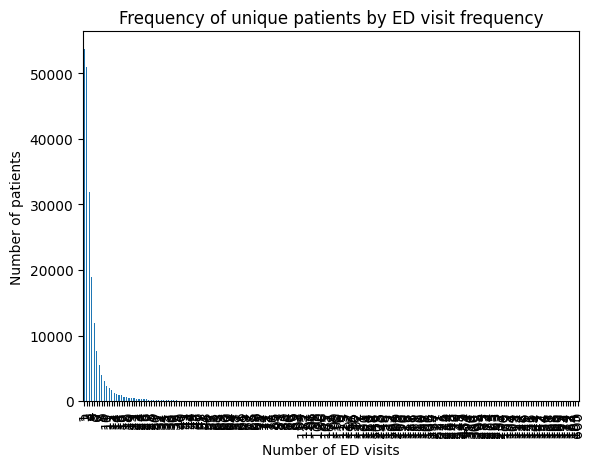

In [ ]:
# Visualize the frequency of unique patients by ED visit frequency and annotate the plot.
ed_diagnosis_df['subject_id'].value_counts().value_counts().plot(kind='bar')
plt.xlabel('Number of ED visits')
plt.ylabel('Number of patients')
plt.title('Frequency of unique patients by ED visit frequency')
plt.show

In [ ]:
# How many priority levels of diagnoses in the ED?
ed_diagnosis_df['seq_num'].value_counts()

,count
seq_num,
1,423989
2,256318
3,127999
4,56342
5,22641
6,8238
7,2593
8,743
9,187


In [ ]:
# Calculate the proportion of ED visits for each priority level.
ed_diagnosis_df['seq_num'].value_counts(normalize=True).round(2)

,proportion
seq_num,
1,0.47
2,0.29
3,0.14
4,0.06
5,0.03
6,0.01
7,0.00
8,0.00
9,0.00


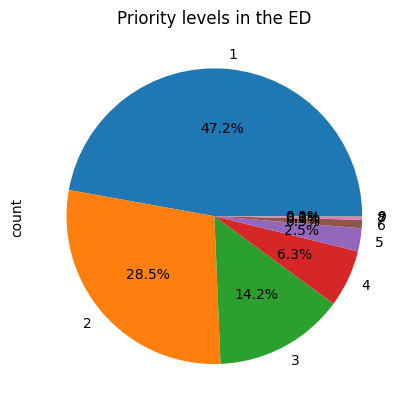

In [ ]:
# Create a pie chart to represent priority levels in the ED.
ed_diagnosis_df['seq_num'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Priority levels in the ED')
plt.show()

In [ ]:
# How many unique ICD codes in the whole dataset?
ed_diagnosis_df['icd_code'].nunique()

13199

In [ ]:
# # How many unique ICD codes under each icd version?
print(ed_diagnosis_df.groupby('icd_version')['icd_code'].nunique())

icd_version
9     4684
10    8526
Name: icd_code, dtype: int64


In [ ]:
# count of ICD code version. a record count (ED visits counts)
ed_diagnosis_df['icd_version'].value_counts()

,count
icd_version,
10,456035
9,443015


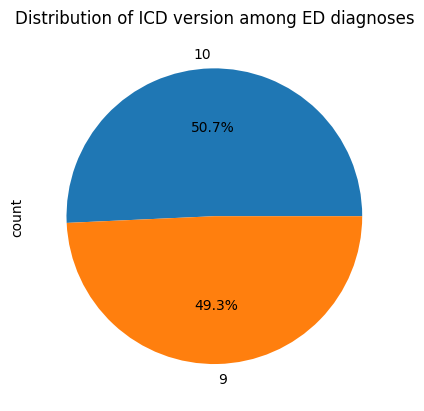

In [ ]:
# Create a pie chart to represent the distribution of ICD version among ED diagnoses.
ed_diagnosis_df['icd_version'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of ICD version among ED diagnoses')
plt.show()

In [ ]:
# Number of unique patients per ICD code version.
ed_diagnosis_df.groupby('icd_version')['subject_id'].nunique()

,subject_id
icd_version,
9,110808
10,121984


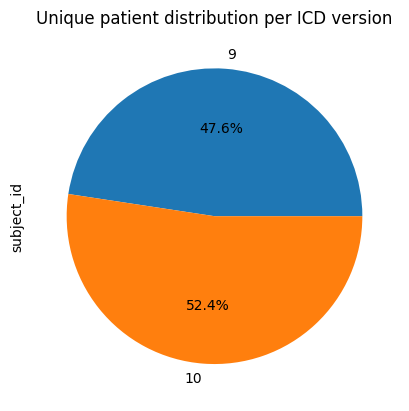

In [ ]:
# Create a pie chart to visualize the unique patient distribution per ICD version
ed_diagnosis_df.groupby('icd_version')['subject_id'].nunique().plot(kind='pie', autopct='%1.1f%%')
plt.title('Unique patient distribution per ICD version')
plt.show()

In [ ]:
# how many unique ED visits for each ICD version?
ed_diagnosis_df.groupby('icd_version')['stay_id'].nunique()

,stay_id
icd_version,
9,202647
10,221342


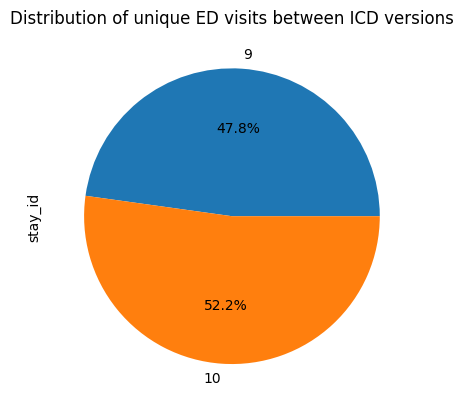

In [ ]:
# create a pie plot to represent the distribution of unique ED visits between ICD versions.
ed_diagnosis_df.groupby('icd_version')['stay_id'].nunique().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of unique ED visits between ICD versions')
plt.show()

* There are two versions of ICD code used to describe ED discharge dianoses.
* ICD version rate per ED stays: ICD-10: 50.7% and ICD-9: 49.3%.
* ICD version rate per unique patient: ICD-10 =52.4%, ICD-9 = 47.6%.
* Although it is a balanced distribution of ICD version among ED stays, it will still be preferrable to use records belonging to one ICD version due to certain challenges like complicated mapping between versions and potential loss of granularity or misclassification if not perfect, as well as increased complexity of the preprocessing to ensure consistency across versions.
* On the other hand, filtering for one ICD version such as ICD-10 (most recent among the two) allows for simpler preprocessing and ensures that all data use the same coding framework to improve model interpretability, in addition to better feature engineering to create meaningful predictors since codes are unified.
* By filtering ICD-9 out, we will lose almost half of the dataset and introduce biased results against the full time frame of the MIMIC-IV-ED dataset.
* We need to link the 'diagnosis.csv' file with the 'edstays.csv' to better understand the time span of the dataset and describe the filter choice.


In [ ]:
# repeat count of records in diagnosis df
ed_diagnosis_df.shape

(899050, 6)

In [ ]:
# count of ICD code version. a record count (ED visits counts)
ed_diagnosis_df['icd_version'].value_counts()

,count
icd_version,
10,456035
9,443015


In [ ]:
# How many unique ICD codes under each icd version?
ed_diagnosis_df.groupby('icd_version')['icd_code'].nunique()

,icd_code
icd_version,
9,4684
10,8526


In [ ]:
# How many unique text diagnoses for each icd version?
ed_diagnosis_df.groupby('icd_version')['icd_title'].nunique()

,icd_title
icd_version,
9,4661
10,8516


* Considering we want to filter the data and include only diagnoses under the ICD-10 version, there are (8,526) unique ICD codes to describe (456,035) ED visits.
* We can try to consolidate diagnoses further by grouping under major categories.


**Conclusions for diagnosis.csv:**
* start by selecting ED stays under ICD-10 version.
* describe nubmer of stays, unique patients, and count of unique diagnoses.
* try to consolidate diagnoses under major groups.

### Processing ED/diagnosis.csv

In [ ]:
# create a new dataframe of records under ICD 10 version.
ed_diagnosis_df_icd10 = ed_diagnosis_df[ed_diagnosis_df['icd_version'] == 10]
print(f"ED diagnosis df ICD-10 shape: {ed_diagnosis_df_icd10.shape}")
ed_diagnosis_df_icd10.head(3)

ED diagnosis df ICD-10 shape: (456035, 6)


,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
16,10000084,35203156,1,R531,10,Weakness
17,10000084,35203156,2,G20,10,Parkinson's disease
18,10000084,36954971,1,R4182,10,"Altered mental status, unspecified"


In [ ]:
print(f"Number of ED visits under ICD-10: {ed_diagnosis_df_icd10['stay_id'].nunique()}")

Number of ED visits under ICD-10: 221342


* Same patient under the same ED visit might have different ICD codes with different priority (seq_num). This is probably related to urgent vs established diagnoses (e.g., weakness (seq_num=1) and Parkinson's disease (seq_num=2)).
* We need to think whether we need to consolidate all diagnoses in one vector per patient or per ED visit when doing the feature engineering step for the model.

In [ ]:
# count of unique patients in new df.
ed_diagnosis_df_icd10['subject_id'].nunique()
print(f"Number of unique patients under ICD-10: {ed_diagnosis_df_icd10['subject_id'].nunique()}")

Number of unique patients under ICD-10: 121984


In [ ]:
# count of unique ICD codes in new df.
ed_diagnosis_df_icd10['icd_code'].nunique()
print(f"Number of unique ICD codes under ICD-10: {ed_diagnosis_df_icd10['icd_code'].nunique()}")

Number of unique ICD codes under ICD-10: 8526


In [ ]:
# Get the distribution of unique ICD codes per ED visits in new df.
ed_diagnosis_df_icd10.groupby('stay_id')['icd_code'].nunique().describe()

,icd_code
count,221342.000000
mean,2.059713
std,1.214700
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,9.000000


<Axes: >

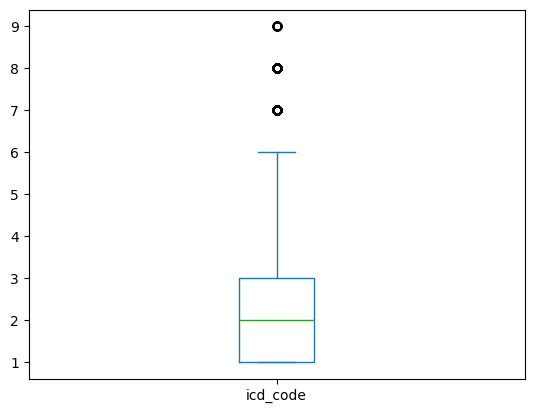

In [ ]:
# Create a box plot for ICD code count per ED visit.
ed_diagnosis_df_icd10.groupby('stay_id')['icd_code'].nunique().plot(kind='box')

In [ ]:
# group the new df by patient ID
ed_diagnosis_df_icd10_grouped = ed_diagnosis_df_icd10.groupby('subject_id')

In [ ]:
# ed_diagnosis_df_icd10_grouped.head()

We need to predict the disposition at the end of each unique ED visit and not per patient because factors for the same patient may change between visits and lead to different outcomes. Thus, we need to do feature engineering to consolidate all input of one visit as one vector.
* The question is should we do it now for the diagnosis.csv file separately or after the merge with other files based on 'subject_id'?

In [ ]:
# # group by stay_id
# ed_diagnosis_df_icd10_grouped_stay = ed_diagnosis_df_icd10.groupby('stay_id')

In [ ]:
# ed_diagnosis_df_icd10_grouped_stay.head()

## edstays.csv Description



There are 9 variables in the edstays.csv:
1. '**subject_id**': a unique identifier of an individual patient.
2. '**hadm_id**': if the patient was admitted to the hospital after their ED stay, hadm_id will contain the hospital identifier. If hadm_id is NULL, the patient was not admitted to the hospital afater their ED stay. hadm_id may be used to link the ED stay with the hospitalization in MIMIC-IV.
3. '**stay_id**': a unique identifier of a single ED stay for a single patient.
4. '**intime**': the admission datetime.
5. '**outtime**': the admission discharge time.
6. '**gender**': the patient's administrative gender.
7. '**race**': the patient's self-reported race. In MIMIC-IV-ED v2.1 there were 33 unique categories for race.
8. '**arrival_transport**': The method through which the individual arrived at the ED.
9. '**disposition**': the method through which the individual left the ED.  



In [ ]:
# display edstays.csv
print(f"ED stays df shape: {ed_edstays_df.shape}")
ed_edstays_df.head(3)

ED stays df shape: (425087, 9)


,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED


In [ ]:
# get edstays info
ed_edstays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425087 entries, 0 to 425086
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   subject_id         425087 non-null  int64  
 1   hadm_id            203016 non-null  float64
 2   stay_id            425087 non-null  int64  
 3   intime             425087 non-null  object 
 4   outtime            425087 non-null  object 
 5   gender             425087 non-null  object 
 6   race               425087 non-null  object 
 7   arrival_transport  425087 non-null  object 
 8   disposition        425087 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 29.2+ MB


In [ ]:
# count of missing values in edstays df
ed_edstays_df.isnull().sum()

,0
subject_id,0
hadm_id,222071
stay_id,0
intime,0
outtime,0
gender,0
race,0
arrival_transport,0
disposition,0


In [ ]:
# get the rate of missing values in edstays df
ed_edstays_df.isnull().mean()

,0
subject_id,0.000000
hadm_id,0.522413
stay_id,0.000000
intime,0.000000
outtime,0.000000
gender,0.000000
race,0.000000
arrival_transport,0.000000
disposition,0.000000


In [ ]:
# how many unique ed visits in the edstays df?
ed_edstays_df['stay_id'].nunique()
print(f"Number of unique ED visits: {ed_edstays_df['stay_id'].nunique()}")

Number of unique ED visits: 425087


In [ ]:
# How many unique patients in the ED stays df?
ed_edstays_df['subject_id'].nunique()
print(f"Number of unique patients: {ed_edstays_df['subject_id'].nunique()}")

Number of unique patients: 205504


In [ ]:
# how many ed visits ended with hospital admission identifier?
ed_edstays_df['hadm_id'].notnull().sum()
print(f"Number of ED visits ended with hospital admission identifier: {ed_edstays_df['hadm_id'].notnull().sum()}")
# get proportion of hospital admission
print(f"Proportion of ED visits ended with hospital admission identifier: {ed_edstays_df['hadm_id'].notnull().mean()}")

Number of ED visits ended with hospital admission identifier: 203016
Proportion of ED visits ended with hospital admission identifier: 0.4775869410261899


In [ ]:
# Gender distribution in original edstays df. NOTE: THIS REPRESENTS DISTRIBUTION PER RECORDS.
ed_edstays_df['gender'].value_counts()
print(f"Gender distribution in original edstays df: {ed_edstays_df['gender'].value_counts()}")
# get proportion of genders in original edstays.df
print(f"Proportion of genders in original edstays df: {ed_edstays_df['gender'].value_counts(normalize=True)}")

Gender distribution in original edstays df: gender
F    229898
M    195189
Name: count, dtype: int64
Proportion of genders in original edstays df: gender
F    0.540826
M    0.459174
Name: proportion, dtype: float64


In [ ]:
# if we drop duplicate entries per subject_id, what is the true distribution of gender in original edstays df?
ed_edstays_df.drop_duplicates(subset=['subject_id'], inplace=True)
ed_edstays_df['gender'].value_counts()
print(f"True gender distribution in original edstays df: {ed_edstays_df['gender'].value_counts()}")
# get proportions of true gender distribution.
print(f"True proportions of genders in original edstays df: {ed_edstays_df['gender'].value_counts(normalize=True)}")

True gender distribution in original edstays df: gender
F    109546
M     95958
Name: count, dtype: int64
True proportions of genders in original edstays df: gender
F    0.53306
M    0.46694
Name: proportion, dtype: float64


In [ ]:
# how many categories of race in original edstays df and what are their counts?
ed_edstays_df['race'].value_counts()
print(f"Number of categories of race in original edstays df: {ed_edstays_df['race'].nunique()}")

Number of categories of race in original edstays df: 33


In [ ]:
# what are the categories of race in originl edstays df with their counts?
print(f"Categories of race in original edstays df: {ed_edstays_df['race'].value_counts()}")

Categories of race in original edstays df: race
WHITE                                        118925
BLACK/AFRICAN AMERICAN                        25648
OTHER                                         11913
UNKNOWN                                        6460
ASIAN                                          4951
HISPANIC/LATINO - PUERTO RICAN                 4594
WHITE - OTHER EUROPEAN                         4505
ASIAN - CHINESE                                4158
HISPANIC/LATINO - DOMINICAN                    3230
BLACK/CAPE VERDEAN                             2784
BLACK/AFRICAN                                  2404
WHITE - RUSSIAN                                2215
BLACK/CARIBBEAN ISLAND                         1662
HISPANIC OR LATINO                             1363
HISPANIC/LATINO - GUATEMALAN                   1069
ASIAN - ASIAN INDIAN                            898
ASIAN - SOUTH EAST ASIAN                        868
WHITE - BRAZILIAN                               848
HISPANIC/LATINO 

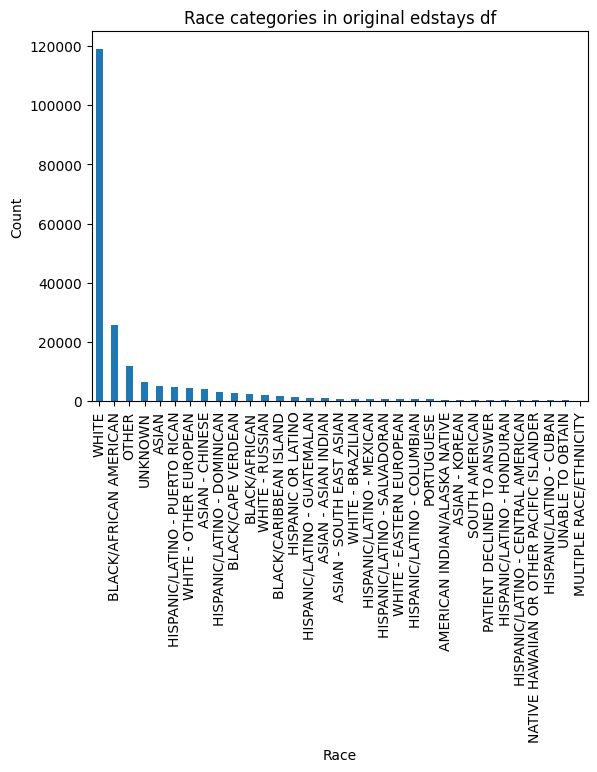

In [ ]:
# create a bar chart to represent race categories in original edstays df
ed_edstays_df['race'].value_counts().plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race categories in original edstays df')
plt.show()

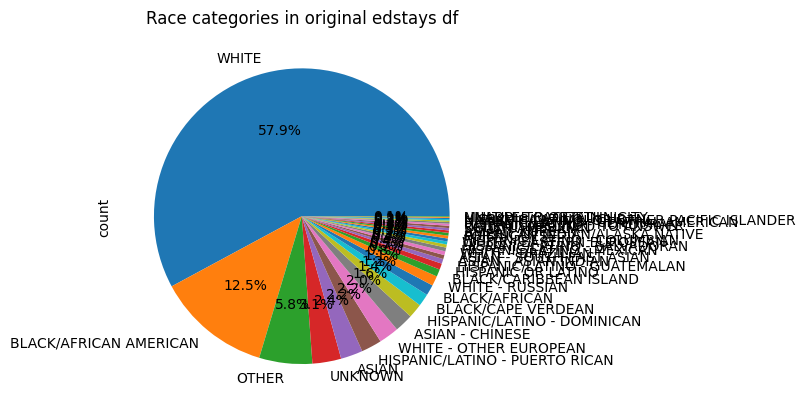

In [ ]:
# create a pie chart to represent race categories in original edstays df
ed_edstays_df['race'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Race categories in original edstays df')
plt.show()

In [ ]:
# if we drop duplicated subject_id, what is the distribution of race categories in original edstays df?
ed_edstays_df.drop_duplicates(subset=['subject_id'], inplace=True)
ed_edstays_df['race'].value_counts()
print(f"True race distribution in original edstays df: {ed_edstays_df['race'].value_counts()}")
# get proportions of true race distribution
print(f"True proportions of races in original edstays df: {ed_edstays_df['race'].value_counts(normalize=True)}")

True race distribution in original edstays df: race
WHITE                                        118925
BLACK/AFRICAN AMERICAN                        25648
OTHER                                         11913
UNKNOWN                                        6460
ASIAN                                          4951
HISPANIC/LATINO - PUERTO RICAN                 4594
WHITE - OTHER EUROPEAN                         4505
ASIAN - CHINESE                                4158
HISPANIC/LATINO - DOMINICAN                    3230
BLACK/CAPE VERDEAN                             2784
BLACK/AFRICAN                                  2404
WHITE - RUSSIAN                                2215
BLACK/CARIBBEAN ISLAND                         1662
HISPANIC OR LATINO                             1363
HISPANIC/LATINO - GUATEMALAN                   1069
ASIAN - ASIAN INDIAN                            898
ASIAN - SOUTH EAST ASIAN                        868
WHITE - BRAZILIAN                               848
HISPANIC/LAT

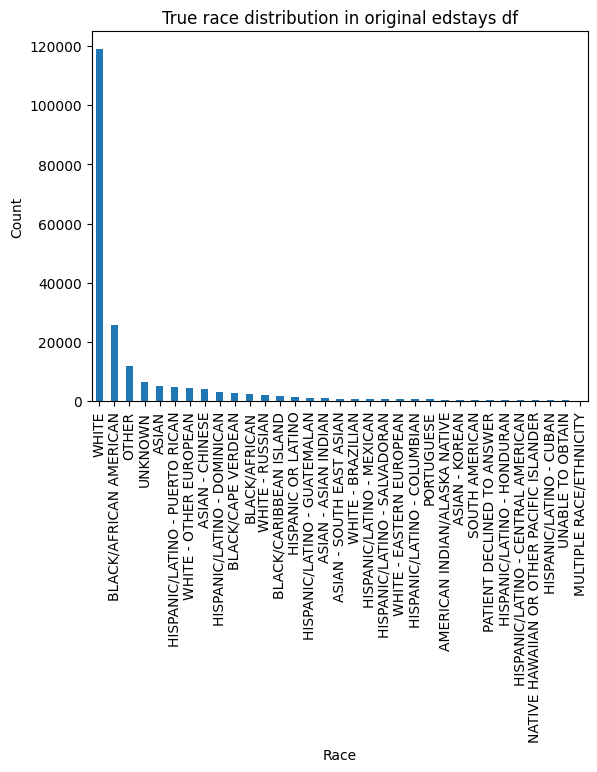

In [ ]:
# Create a bar chart to represent the true race distribution in original edstays df
ed_edstays_df['race'].value_counts().plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('True race distribution in original edstays df')
plt.show()

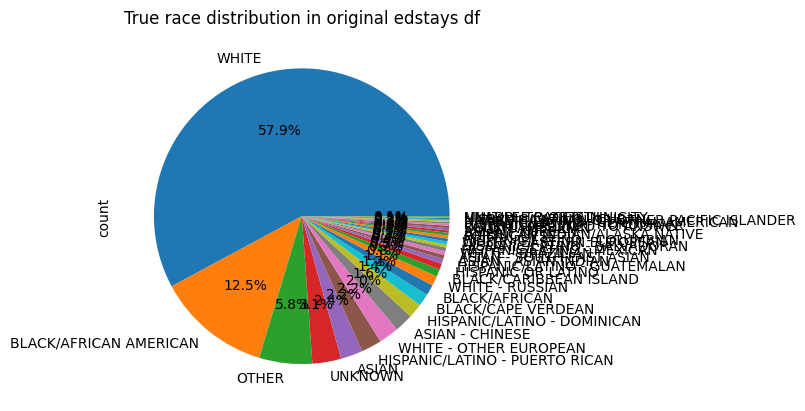

In [ ]:
# Create a pie chart to represent the true race distribution in original edstays df
ed_edstays_df['race'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('True race distribution in original edstays df')
plt.show()

In [ ]:
# what are the arrival methods in original edstays df??
print(f"Arrival methods in original edstays df: {ed_edstays_df['arrival_transport'].value_counts()}")

Arrival methods in original edstays df: arrival_transport
WALK IN       117685
AMBULANCE      77796
UNKNOWN         8589
HELICOPTER       728
OTHER            706
Name: count, dtype: int64


In [ ]:
# calculate the proportions of arrival methods in original edstays df
print(f"Proportions of arrival methods in original edstays df: {ed_edstays_df['arrival_transport'].value_counts(normalize=True)}")

Proportions of arrival methods in original edstays df: arrival_transport
WALK IN       0.572665
AMBULANCE     0.378562
UNKNOWN       0.041795
HELICOPTER    0.003543
OTHER         0.003435
Name: proportion, dtype: float64


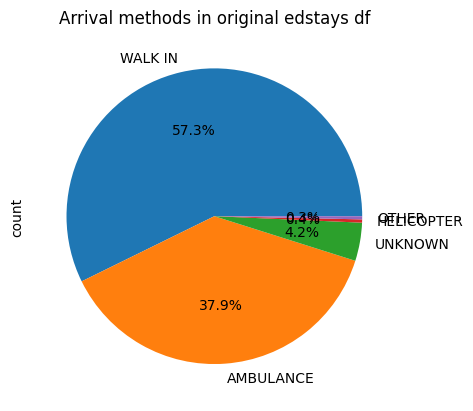

In [ ]:
# create a pie chart to represent arrival methods in the original edstays df
ed_edstays_df['arrival_transport'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Arrival methods in original edstays df')
plt.show()

In [ ]:
# what are the disposition options in the original edstays df?
print(f"Disposition options in the original edstays df: {ed_edstays_df['disposition'].value_counts()}")

Disposition options in the original edstays df: disposition
HOME                           111370
ADMITTED                        82442
TRANSFER                         3573
OTHER                            2983
LEFT WITHOUT BEING SEEN          2428
ELOPED                           1798
LEFT AGAINST MEDICAL ADVICE       679
EXPIRED                           231
Name: count, dtype: int64


In [ ]:
# calculate proportions for disposition options in original edstays df.
print(f"Proportions for disposition options in original edstays df: {ed_edstays_df['disposition'].value_counts(normalize=True)}")

Proportions for disposition options in original edstays df: disposition
HOME                           0.541936
ADMITTED                       0.401170
TRANSFER                       0.017387
OTHER                          0.014516
LEFT WITHOUT BEING SEEN        0.011815
ELOPED                         0.008749
LEFT AGAINST MEDICAL ADVICE    0.003304
EXPIRED                        0.001124
Name: proportion, dtype: float64


In [ ]:
# there seems to be a discripency between hadm_id non-null values and admitted disposition.
print(f"Number of hadm_id non-null values: {ed_edstays_df['hadm_id'].notnull().sum()}")
print(f"Number of admitted disposition: {ed_edstays_df['disposition'].value_counts()['ADMITTED']}")

Number of hadm_id non-null values: 107391
Number of admitted disposition: 82442


In [ ]:
# create a subset df of all non-null hadm_id records
ed_edstays_df_hadm_id = ed_edstays_df[ed_edstays_df['hadm_id'].notnull()]
print(f"Number of non-null hadm_id records: {ed_edstays_df_hadm_id.shape}")
ed_edstays_df_hadm_id.head(3)

Number of non-null hadm_id records: (107391, 9)


,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
5,10000084,23052089.0,35203156,2160-11-20 20:36:00,2160-11-21 03:20:00,M,WHITE,WALK IN,ADMITTED
7,10000108,27250926.0,36533795,2163-09-27 16:18:00,2163-09-28 09:04:00,M,WHITE,WALK IN,HOME


In [ ]:
# what are the various disposition options for patients who had hadm_id?
print(f"Disposition options for patients who had hadm_id: {ed_edstays_df_hadm_id['disposition'].value_counts()}")

Disposition options for patients who had hadm_id: disposition
ADMITTED                       82242
HOME                           20142
TRANSFER                        2615
OTHER                           1839
ELOPED                           339
LEFT AGAINST MEDICAL ADVICE      168
LEFT WITHOUT BEING SEEN           36
EXPIRED                           10
Name: count, dtype: int64


### Processing edstays.csv

To process the edstays.csv:
1. Filter based on the diagnosis ICD-10 df list of stay_id or subject_id.
2. Find out the best way to imputate NULLs in hadm_id since it means no admission.
3. Create a column for time difference (in hours) between intime and outtime to represent the time spent in the ED.
4. consolidate race categories into fewer groups

In [ ]:
# redisplay edstays df
print(f"ED stays df shape: {ed_edstays_df.shape}")
ed_edstays_df.head(3)

ED stays df shape: (425087, 9)


,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED


In [ ]:
# create a list of stay_id from diagnosis ICD-10 df.
ed_diagnosis_df_icd10_stay_id = ed_diagnosis_df_icd10['stay_id'].unique()
print(f"Number of unique stay_id in diagnosis ICD-10 df: {len(ed_diagnosis_df_icd10_stay_id)}")

Number of unique stay_id in diagnosis ICD-10 df: 221342


In [ ]:
# Create a subset df of edstays that has the stay_ids from diagnosis ICD-10
ed_edstays_df_icd10 = ed_edstays_df[ed_edstays_df['stay_id'].isin(ed_diagnosis_df_icd10_stay_id)]
print(f"ED stays df ICD-10 shape: {ed_edstays_df_icd10.shape}")
ed_edstays_df_icd10.head(3)

ED stays df ICD-10 shape: (221342, 9)


,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
5,10000084,23052089.0,35203156,2160-11-20 20:36:00,2160-11-21 03:20:00,M,WHITE,WALK IN,ADMITTED
6,10000084,29888819.0,36954971,2160-12-27 18:32:00,2160-12-28 16:07:00,M,WHITE,AMBULANCE,HOME
10,10000115,NaN,30295111,2154-12-17 16:37:00,2154-12-17 16:59:00,M,WHITE,WALK IN,HOME


In [ ]:
# get the number of unique ed visits in filtered edstays df
print(f"Number of unique ED visits in filtered edstays df: {ed_edstays_df_icd10['stay_id'].nunique()}")

Number of unique ED visits in filtered edstays df: 221342


In [ ]:
# get the number of unique patients in the filtered edstays df
print(f"Number of unique patients in filtered edstays df: {ed_edstays_df_icd10['subject_id'].nunique()}")

Number of unique patients in filtered edstays df: 121984


In [ ]:
# count of missing values in filtered df
ed_edstays_df_icd10.isnull().sum()

,0
subject_id,0
hadm_id,115756
stay_id,0
intime,0
outtime,0
gender,0
race,0
arrival_transport,0
disposition,0


In [ ]:
# what options of disposition in the filtered edstays df
print(f"Disposition options in the filtered edstays df: {ed_edstays_df_icd10['disposition'].value_counts()}")

Disposition options in the filtered edstays df: disposition
HOME                           122606
ADMITTED                        83905
TRANSFER                         4364
LEFT WITHOUT BEING SEEN          3838
ELOPED                           3356
OTHER                            1881
LEFT AGAINST MEDICAL ADVICE      1215
EXPIRED                           177
Name: count, dtype: int64


In [ ]:
# create a subset df of admitted diposition and check count of missing values
ed_edstays_df_icd10_admitted = ed_edstays_df_icd10[ed_edstays_df_icd10['disposition'] == 'ADMITTED']
print(f"ED stays df ICD-10 admitted shape: {ed_edstays_df_icd10_admitted.shape}")
ed_edstays_df_icd10_admitted.isnull().sum()

ED stays df ICD-10 admitted shape: (83905, 9)


,0
subject_id,0
hadm_id,220
stay_id,0
intime,0
outtime,0
gender,0
race,0
arrival_transport,0
disposition,0


since there is discripency between admitted disposition and the availability of hadm_id as a confirmation of hospital admission, and since we don't need futher information from their hospital stay, we can drop 'hadm_id' column for this analysis and use only admission info in the disposition column.

In [ ]:
# create a subset df without hadm_id column
ed_edstays_df_icd10_no_hadm = ed_edstays_df_icd10.drop(columns=['hadm_id'])
print(f"ED stays df ICD-10 no hadm shape: {ed_edstays_df_icd10_no_hadm.shape}")
ed_edstays_df_icd10_no_hadm.head(3)

ED stays df ICD-10 no hadm shape: (221342, 8)


,subject_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
5,10000084,35203156,2160-11-20 20:36:00,2160-11-21 03:20:00,M,WHITE,WALK IN,ADMITTED
6,10000084,36954971,2160-12-27 18:32:00,2160-12-28 16:07:00,M,WHITE,AMBULANCE,HOME
10,10000115,30295111,2154-12-17 16:37:00,2154-12-17 16:59:00,M,WHITE,WALK IN,HOME


In [ ]:
# convert intime and outtime to datetime
ed_edstays_df_icd10_no_hadm['intime'] = pd.to_datetime(ed_edstays_df_icd10_no_hadm['intime'])
ed_edstays_df_icd10_no_hadm['outtime'] = pd.to_datetime(ed_edstays_df_icd10_no_hadm['outtime'])
print(f"ED stays df ICD-10 no hadm shape: {ed_edstays_df_icd10_no_hadm.shape}")
ed_edstays_df_icd10_no_hadm.info()

ED stays df ICD-10 no hadm shape: (221342, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 221342 entries, 5 to 425085
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   subject_id         221342 non-null  int64         
 1   stay_id            221342 non-null  int64         
 2   intime             221342 non-null  datetime64[ns]
 3   outtime            221342 non-null  datetime64[ns]
 4   gender             221342 non-null  object        
 5   race               221342 non-null  object        
 6   arrival_transport  221342 non-null  object        
 7   disposition        221342 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 15.2+ MB


In [ ]:
# create a new column of ED length of stay in hours difference between outtime and intime.
ed_edstays_df_icd10_no_hadm['ed_length_of_stay'] = ed_edstays_df_icd10_no_hadm['outtime'] - ed_edstays_df_icd10_no_hadm['intime']
# convert the timedelta64 to hours
ed_edstays_df_icd10_no_hadm['ed_length_of_stay'] = ed_edstays_df_icd10_no_hadm['ed_length_of_stay'].dt.total_seconds() / 3600

In [ ]:
# redisplay df
print(f"ED stays df ICD-10 no hadm shape: {ed_edstays_df_icd10_no_hadm.shape}")
ed_edstays_df_icd10_no_hadm.head(3)

ED stays df ICD-10 no hadm shape: (221342, 9)


,subject_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,ed_length_of_stay
5,10000084,35203156,2160-11-20 20:36:00,2160-11-21 03:20:00,M,WHITE,WALK IN,ADMITTED,6.733333
6,10000084,36954971,2160-12-27 18:32:00,2160-12-28 16:07:00,M,WHITE,AMBULANCE,HOME,21.583333
10,10000115,30295111,2154-12-17 16:37:00,2154-12-17 16:59:00,M,WHITE,WALK IN,HOME,0.366667


In [ ]:
# create a new df without intime and outtime columns
ed_edstays_df_icd10_no_hadm_time = ed_edstays_df_icd10_no_hadm.drop(columns=['intime', 'outtime'])
print(f"ED stays df ICD-10 no time shape: {ed_edstays_df_icd10_no_hadm_time.shape}")
ed_edstays_df_icd10_no_hadm_time.head(3)


ED stays df ICD-10 no time shape: (221342, 7)


,subject_id,stay_id,gender,race,arrival_transport,disposition,ed_length_of_stay
5,10000084,35203156,M,WHITE,WALK IN,ADMITTED,6.733333
6,10000084,36954971,M,WHITE,AMBULANCE,HOME,21.583333
10,10000115,30295111,M,WHITE,WALK IN,HOME,0.366667


In [ ]:
# if we drop duplicate subject ids, what is the gender distribution in the new df
ed_edstays_df_icd10_no_hadm_time.drop_duplicates(subset=['subject_id'], inplace=False)
print(f"Gender distribution: {ed_edstays_df_icd10_no_hadm_time['gender'].value_counts()}")
# get proportions of gender
print(f"Gender proportions: {ed_edstays_df_icd10_no_hadm_time['gender'].value_counts(normalize=True)}")

Gender distribution: gender
F    118956
M    102386
Name: count, dtype: int64
Gender proportions: gender
F    0.537431
M    0.462569
Name: proportion, dtype: float64


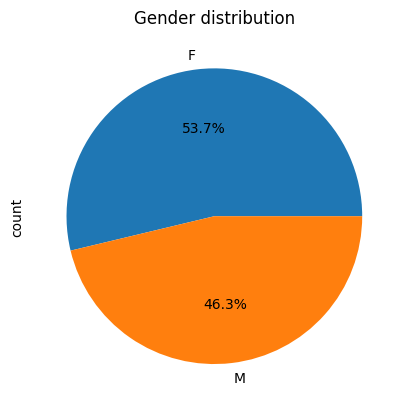

In [ ]:
# create a pie chart for gender distribution
ed_edstays_df_icd10_no_hadm_time['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender distribution')
plt.show()

In [ ]:
# get the distribution of race in new df
print(f"Race distribution: {ed_edstays_df_icd10_no_hadm_time['race'].value_counts()}")

Race distribution: race
WHITE                                        115851
BLACK/AFRICAN AMERICAN                        40238
OTHER                                         11293
HISPANIC/LATINO - PUERTO RICAN                 7412
WHITE - OTHER EUROPEAN                         5755
HISPANIC/LATINO - DOMINICAN                    4556
UNKNOWN                                        4301
ASIAN - CHINESE                                4235
ASIAN                                          4101
BLACK/CAPE VERDEAN                             4051
WHITE - RUSSIAN                                3169
BLACK/AFRICAN                                  2852
BLACK/CARIBBEAN ISLAND                         2166
HISPANIC/LATINO - GUATEMALAN                   1319
WHITE - BRAZILIAN                               921
HISPANIC/LATINO - SALVADORAN                    894
ASIAN - ASIAN INDIAN                            842
PORTUGUESE                                      818
ASIAN - SOUTH EAST ASIAN                

In [ ]:
# get the proportions of race distribution in new df
print(f"Race proportions: {ed_edstays_df_icd10_no_hadm_time['race'].value_counts(normalize=True)}")

Race proportions: race
WHITE                                        0.523403
BLACK/AFRICAN AMERICAN                       0.181791
OTHER                                        0.051021
HISPANIC/LATINO - PUERTO RICAN               0.033487
WHITE - OTHER EUROPEAN                       0.026000
HISPANIC/LATINO - DOMINICAN                  0.020584
UNKNOWN                                      0.019431
ASIAN - CHINESE                              0.019133
ASIAN                                        0.018528
BLACK/CAPE VERDEAN                           0.018302
WHITE - RUSSIAN                              0.014317
BLACK/AFRICAN                                0.012885
BLACK/CARIBBEAN ISLAND                       0.009786
HISPANIC/LATINO - GUATEMALAN                 0.005959
WHITE - BRAZILIAN                            0.004161
HISPANIC/LATINO - SALVADORAN                 0.004039
ASIAN - ASIAN INDIAN                         0.003804
PORTUGUESE                                   0.003696
ASIAN

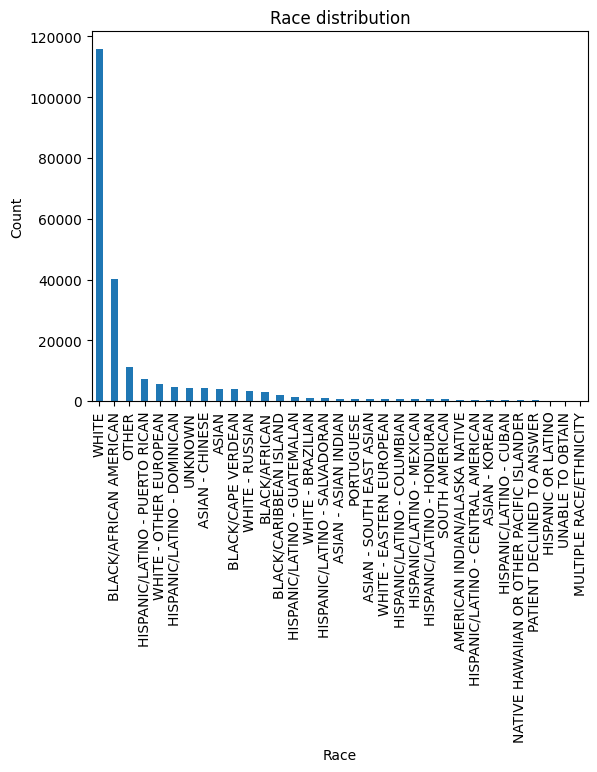

In [ ]:
# create a bar chart for race distribution in new df
ed_edstays_df_icd10_no_hadm_time['race'].value_counts().plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race distribution')
plt.show()

We need to consolidate 33 race categories into 5 groups:
Consolidated Groups:

**White**
WHITE
WHITE - OTHER EUROPEAN
WHITE - RUSSIAN
WHITE - BRAZILIAN
WHITE - EASTERN EUROPEAN
PORTUGUESE

**Black/African**
BLACK/AFRICAN AMERICAN
BLACK/AFRICAN
BLACK/CAPE VERDEAN
BLACK/CARIBBEAN ISLAND

**Asian**
ASIAN
ASIAN - CHINESE
ASIAN - ASIAN INDIAN
ASIAN - SOUTH EAST ASIAN
ASIAN - KOREAN

**Hispanic/Latino**
HISPANIC/LATINO - PUERTO RICAN
HISPANIC/LATINO - DOMINICAN
HISPANIC/LATINO - GUATEMALAN
HISPANIC/LATINO - SALVADORAN
HISPANIC/LATINO - MEXICAN
HISPANIC/LATINO - COLUMBIAN
HISPANIC/LATINO - HONDURAN
HISPANIC/LATINO - CENTRAL AMERICAN
HISPANIC/LATINO - CUBAN
HISPANIC OR LATINO
SOUTH AMERICAN

**Native and Indigenous**
AMERICAN INDIAN/ALASKA NATIVE
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER
Other/Unknown

**OTHER**
UNKNOWN
PATIENT DECLINED TO ANSWER
UNABLE TO OBTAIN
MULTIPLE RACE/ETHNICITY
This reduces the list from 33 categories to 6 consolidated groups.

In [ ]:
# consolidate 33 race categories into 6 main groups
import re

# create a consolidation function
race_mapping = {
    # White
    'WHITE': 'White',
    'WHITE - OTHER EUROPEAN': 'White',
    'WHITE - RUSSIAN': 'White',
    'WHITE - BRAZILIAN': 'White',
    'WHITE - EASTERN EUROPEAN': 'White',
    'PORTUGUESE': 'White',

    # Black
    'BLACK/AFRICAN AMERICAN': 'Black',
    'BLACK/AFRICAN': 'Black',
    'BLACK/CAPE VERDEAN': 'Black',
    'BLACK/CARIBBEAN ISLAND': 'Black',

    # Asian
    'ASIAN': 'Asian',
    'ASIAN - CHINESE': 'Asian',
    'ASIAN - ASIAN INDIAN': 'Asian',
    'ASIAN - SOUTH EAST ASIAN': 'Asian',
    'ASIAN - KOREAN': 'Asian',

    # Hispanic/Latino
    'HISPANIC/LATINO': 'Hispanic/Latino',
    'HISPANIC/LATINO - PUERTO RICAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - DOMINICAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - GUATEMALAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - SALVADORAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - MEXICAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - COLUMBIAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - HONDURAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - CENTRAL AMERICAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - CUBAN': 'Hispanic/Latino',
    'HISPANIC OR LATINO': 'Hispanic/Latino',
    'SOUTH AMERICAN': 'Hispanic/Latino',

    # Native and Indigenous
    'AMERICAN INDIAN/ALASKA NATIVE': 'Native and Indigenous',
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'Native and Indigenous',

    # Other/Unknown
    'OTHER': 'Other/Unknown',
    'UNKNOWN': 'Other/Unknown',
    'PATIENT DECLINED TO ANSWER': 'Other/Unknown',
    'UNABLE TO OBTAIN': 'Other/Unknown',
    'MULTIPLE RACE/ETHNICITY': 'Other/Unknown'
}

# # Function to consolidate race categories
# def consolidate_race(race):
#   race = str(race).upper()
#   return race_mapping.get(race, 'Other')

# Apply the consolidation
ed_edstays_df_icd10_no_hadm_time_race = ed_edstays_df_icd10_no_hadm_time.copy()
ed_edstays_df_icd10_no_hadm_time_race['race_consolidated'] = ed_edstays_df_icd10_no_hadm_time_race['race'].map(race_mapping)

# get new counts
print(ed_edstays_df_icd10_no_hadm_time_race['race_consolidated'].value_counts())

# get percentages
print(ed_edstays_df_icd10_no_hadm_time_race['race_consolidated'].value_counts(normalize=True))


race_consolidated
White                    127311
Black                     49307
Hispanic/Latino           17640
Other/Unknown             15891
Asian                     10388
Native and Indigenous       805
Name: count, dtype: int64
race_consolidated
White                    0.575178
Black                    0.222764
Hispanic/Latino          0.079696
Other/Unknown            0.071794
Asian                    0.046932
Native and Indigenous    0.003637
Name: proportion, dtype: float64


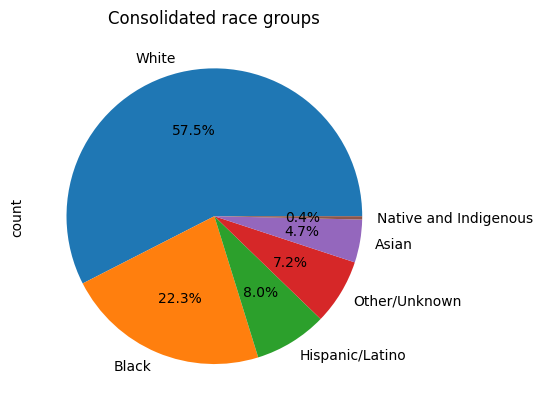

In [ ]:
# create a pie chart to represent consolidated race groups
ed_edstays_df_icd10_no_hadm_time_race['race_consolidated'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Consolidated race groups')
plt.show()

In [ ]:
# Count of missing values
ed_edstays_df_icd10_no_hadm_time_race.isnull().sum()

,0
subject_id,0
stay_id,0
gender,0
race,0
arrival_transport,0
disposition,0
ed_length_of_stay,0
race_consolidated,0


In [ ]:
# drop race column
ed_edstays_df_icd10_no_hadm_time_raceconsolidated = ed_edstays_df_icd10_no_hadm_time_race.copy()
ed_edstays_df_icd10_no_hadm_time_raceconsolidated.drop(columns=['race'], inplace=True)
print(f"ED stays df ICD-10 no race shape: {ed_edstays_df_icd10_no_hadm_time_raceconsolidated.shape}")

ED stays df ICD-10 no race shape: (221342, 7)


In [ ]:
# count of missing values
ed_edstays_df_icd10_no_hadm_time_raceconsolidated.isnull().sum()

,0
subject_id,0
stay_id,0
gender,0
arrival_transport,0
disposition,0
ed_length_of_stay,0
race_consolidated,0


### Merge diagnosis and edstays

In [ ]:
# # merge diagnosis df icd-10 and filtered edstays no hadm no time on 'subject_id' and 'stay_id"
# ed_diagnosis_edstays_df_merged_subject_stay = pd.merge(ed_diagnosis_df_icd10, ed_edstays_df_icd10_no_hadm_time_raceconsolidated, on=['subject_id', 'stay_id'])
# print(f"Merged diagnosis and edstays df shape: {ed_diagnosis_edstays_df_merged_subject_stay.shape}")
# ed_diagnosis_edstays_df_merged_subject_stay.head(3)

In [ ]:
# merge diagnosis df icd-10 and filtered edstays no hadm no time race on 'subject_id' and 'stay_id"
ed_dx_stay_merged_df = pd.merge(ed_diagnosis_df_icd10, ed_edstays_df_icd10_no_hadm_time_raceconsolidated, on=['subject_id', 'stay_id'])
print(f"Merged diagnosis and edstays df shape: {ed_dx_stay_merged_df.shape}")
ed_dx_stay_merged_df.head(3)

Merged diagnosis and edstays df shape: (456035, 11)


,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,gender,arrival_transport,disposition,ed_length_of_stay,race_consolidated
0,10000084,35203156,1,R531,10,Weakness,M,WALK IN,ADMITTED,6.733333,White
1,10000084,35203156,2,G20,10,Parkinson's disease,M,WALK IN,ADMITTED,6.733333,White
2,10000084,36954971,1,R4182,10,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White


In [ ]:
# how many unique ed visits in merged on subject id and stay id df
print(f"Number of unique ED visits in merged on subject id and stay id df: {ed_dx_stay_merged_df['stay_id'].nunique()}")

Number of unique ED visits in merged on subject id and stay id df: 221342


In [ ]:
# how many unique patients in merged on subject id and stay id df
print(f"Number of unique patients in merged on subject id and stay id df: {ed_dx_stay_merged_df['subject_id'].nunique()}")

Number of unique patients in merged on subject id and stay id df: 121984


In [ ]:
# write out the merged df to a csv file
ed_dx_stay_merged_df.to_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/ed_dx_stay_merged_df.csv', index=False)

In [ ]:
#reload the merged diagnosis and stay id df
ed_dx_stay_merged_df = pd.read_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/ed_dx_stay_merged_df.csv')
print(f"Merged diagnosis and edstays df shape: {ed_dx_stay_merged_df.shape}")
ed_dx_stay_merged_df.head(3)

Merged diagnosis and edstays df shape: (456035, 11)


,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,gender,arrival_transport,disposition,ed_length_of_stay,race_consolidated
0,10000084,35203156,1,R531,10,Weakness,M,WALK IN,ADMITTED,6.733333,White
1,10000084,35203156,2,G20,10,Parkinson's disease,M,WALK IN,ADMITTED,6.733333,White
2,10000084,36954971,1,R4182,10,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White


In [ ]:
# count of missing values
ed_dx_stay_merged_df.isnull().sum()

,0
subject_id,0
stay_id,0
seq_num,0
icd_code,0
icd_version,0
icd_title,0
gender,0
arrival_transport,0
disposition,0
ed_length_of_stay,0


In [ ]:
# count of ed visits
print(f"Number of unique ED visits: {ed_dx_stay_merged_df['stay_id'].nunique()}")

Number of unique ED visits: 221342


In [ ]:
# count of patients
print(f"Number of unique patients: {ed_dx_stay_merged_df['subject_id'].nunique()}")

Number of unique patients: 121984




---



# MEDRECON.csv Description

The medrecon file provides information about the current medications the patient is on when admitted to the ED.

There are 9 variables in the medrecon.csv:
1. '**subject_id**':
2. '**stay_id**':
3. '**charttime**': the time at which the medication reconciliation was charted.
4. '**name**': name of the medication.
5. '**gsn**': the generic sequence number, an ontology for th emedication
5. '**ndc**': the national drug code for the medication.
6. '**etc_rn**': medications are grouped using a hierarchical ontology (ETC). as more than one group may be associated with the medication, a sequential integer (etc_rn) was generated to differentiate the groups. there is no meaning to the order of etc_rn.
7. '**etc_code**': provides etc code.
8. '**etcdescription**': provides the description of the group.

In [ ]:
# display medrecon df
print(f"Medrecon df shape: {ed_medrecon_df.shape}")
ed_medrecon_df.head(3)

Medrecon df shape: (2987342, 9)


,subject_id,stay_id,charttime,name,gsn,ndc,etc_rn,etccode,etcdescription
0,10000032,32952584,2180-07-22 17:26:00,albuterol sulfate,28090,21695042308,1,5970.0,Asthma/COPD Therapy - Beta 2-Adrenergic Agents...
1,10000032,32952584,2180-07-22 17:26:00,calcium carbonate,1340,10135021101,1,733.0,Minerals and Electrolytes - Calcium Replacement
2,10000032,32952584,2180-07-22 17:26:00,cholecalciferol (vitamin D3),65241,37205024678,1,670.0,Vitamins - D Derivatives


In [ ]:
# get medrecon info
ed_medrecon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987342 entries, 0 to 2987341
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   subject_id      int64  
 1   stay_id         int64  
 2   charttime       object 
 3   name            object 
 4   gsn             int64  
 5   ndc             int64  
 6   etc_rn          int64  
 7   etccode         float64
 8   etcdescription  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 205.1+ MB


In [ ]:
# count of missing values
ed_medrecon_df.isnull().sum()

,0
subject_id,0
stay_id,0
charttime,0
name,0
gsn,0
ndc,0
etc_rn,0
etccode,11728
etcdescription,11728


In [ ]:
# get the number of unique ed visits in medrecon
print(f"Number of unique ED visits in medrecon: {ed_medrecon_df['stay_id'].nunique()}")

Number of unique ED visits in medrecon: 307196


In [ ]:
# get the number of unique patient in medrecon
print(f"Number of unique patients in medrecon: {ed_medrecon_df['subject_id'].nunique()}")

Number of unique patients in medrecon: 141464


In [ ]:
# how many different gsn codes?
print(f"Number of different gsn codes: {ed_medrecon_df['gsn'].nunique()}")

Number of different gsn codes: 9179


In [ ]:
# how many different ndc codes?
print(f"Number of different ndc codes: {ed_medrecon_df['ndc'].nunique()}")

Number of different ndc codes: 9313


In [ ]:
# how many different medication names?
print(f"Number of different medication names: {ed_medrecon_df['name'].nunique()}")

Number of different medication names: 18746


In [ ]:
# how many etc codes?
print(f"Number of different etc codes: {ed_medrecon_df['etccode'].nunique()}")

Number of different etc codes: 1201


In [ ]:
# How many etc groups?
print(f"Number of different etc groups: {ed_medrecon_df['etcdescription'].nunique()}")

Number of different etc groups: 1205


In [ ]:
# how many ranking of etc group?
print(f"Number of different ranking of etc group: {ed_medrecon_df['etc_rn'].nunique()}")

Number of different ranking of etc group: 5


In [ ]:
# what is the frequency of records in each etc ranking?
print(f"Frequency of records in each etc ranking: {ed_medrecon_df['etc_rn'].value_counts()}")

Frequency of records in each etc ranking: etc_rn
1    2598365
2     359937
3      29038
4          1
5          1
Name: count, dtype: int64


If we had more time, we would sort out the ranking in one group of medication per patient.

### Processing of medrecon.csv

to process medrecon:
1. drop charttime
2. remove records with etc_rn >1 to reduce redundancy per patient.
2. filter based on diagnosis_edstays list of patients and visits
3. merge with previous df

In [ ]:
# create a new df and drop charttime column from medreco
ed_medrecon_df_no_charttime = ed_medrecon_df.drop(columns=['charttime'])
print(f"Medrecon df no charttime shape: {ed_medrecon_df_no_charttime.shape}")

Medrecon df no charttime shape: (2987342, 8)


In [ ]:
# # redisplay the count of list of unique stay_id
# print(f"Number of unique stay_id in diagnosis ICD-10 df: {len(ed_diagnosis_df_icd10_stay_id)}")

In [ ]:
# get the list of unique stay_id from merged diagnosis stay df
ed_diagnosis_stay_merged_df_stay_id_list= ed_dx_stay_merged_df['stay_id'].unique()
print(f"Number of unique stay_id in merged diagnosis stay df: {len(ed_diagnosis_stay_merged_df_stay_id_list)}")

Number of unique stay_id in merged diagnosis stay df: 221342


In [ ]:
# create a new df and drop rows where etc_rn >1
ed_medrecon_df_no_charttime_unique_etc_rn = ed_medrecon_df_no_charttime[ed_medrecon_df_no_charttime['etc_rn'] == 1]
print(f"Medrecon df no charttime and unique etc_rn shape: {ed_medrecon_df_no_charttime_unique_etc_rn.shape}")

Medrecon df no charttime and unique etc_rn shape: (2598365, 8)


In [ ]:
# how many unique visits after removin etc ranking?
print(f"Number of unique ED visits after removing etc ranking: {ed_medrecon_df_no_charttime_unique_etc_rn['stay_id'].nunique()}")

Number of unique ED visits after removing etc ranking: 307196


In [ ]:
# how many unique patients after removing etc ranking?
print(f"Number of unique patients after removing etc ranking: {ed_medrecon_df_no_charttime_unique_etc_rn['subject_id'].nunique()}")

Number of unique patients after removing etc ranking: 141464


Notice no change in the number of ED visits or unique patients after removing ETC ranking above 1, which ensures no loss of core data.

medication list might change for the same patient from one visit to the other.
That's why we filter the medrecon df for existing ED visits and not subject_id.

In [ ]:
# filter the new medrecon df based on the stay_id list
ed_medrecon_df_icd10 = ed_medrecon_df_no_charttime_unique_etc_rn[ed_medrecon_df_no_charttime_unique_etc_rn['stay_id'].isin(ed_diagnosis_stay_merged_df_stay_id_list)]
print(f"Medrecon df ICD-10 shape: {ed_medrecon_df_icd10.shape}")

Medrecon df ICD-10 shape: (1370020, 8)


In [ ]:
# how many ed visits in the filtered medrecon df
print(f"Number of unique ED visits in filtered medrecon df: {ed_medrecon_df_icd10['stay_id'].nunique()}")

Number of unique ED visits in filtered medrecon df: 158982


In [ ]:
# how many unique patients in the filtered medrecon df?
print(f"Number of unique patients in filtered medrecon df: {ed_medrecon_df_icd10['subject_id'].nunique()}")

Number of unique patients in filtered medrecon df: 84670


* It's not medically sound to exclude all patient who don't have records in the medrecon files because it's not necessary for a patient to be on any medication to have an acute health complaint that requires a visit to the ED.
* It is better to merge this filtered medrecon file with the merged diagnosis_edstays df and imputate the missing values of medication with a zero.

In [ ]:
# get the list of unique patients from merged diagnosis_edstays df
patient_list1 = ed_dx_stay_merged_df['subject_id'].unique()
print(f"Number of unique patients in merged diagnosis_edstays df: {len(patient_list1)}")

Number of unique patients in merged diagnosis_edstays df: 121984


In [ ]:
# create a subset df of patient list from the medrecon df
medrecon_patient_list = ed_medrecon_df_no_charttime_unique_etc_rn[ed_medrecon_df_no_charttime_unique_etc_rn['subject_id'].isin(patient_list1)]
print(f"Medrecon df patient list shape: {medrecon_patient_list.shape}")
medrecon_patient_list.head(3)

Medrecon df patient list shape: (1967242, 8)


,subject_id,stay_id,name,gsn,ndc,etc_rn,etccode,etcdescription
58,10000084,35203156,loratadine,66621,11523720001,1,290.0,Antihistamines - 2nd Generation
60,10000084,35203156,Azilect,59121,16714077101,1,2688.0,Antiparkinson Therapy - Monoamine Oxidase Inhi...
61,10000084,35203156,pramipexole,31779,13668009405,1,2691.0,Antiparkinson Therapy - Non-ergot Dopamine Ago...


In [ ]:
# how many ed visits in medrecon_patient_list?
print(f"Number of unique ED visits in medrecon_patient_list: {medrecon_patient_list['stay_id'].nunique()}")

Number of unique ED visits in medrecon_patient_list: 221948


In [ ]:
# How many unique patients in medrecon_patient_list?
print(f"Number of unique patients in medrecon_patient_list: {medrecon_patient_list['subject_id'].nunique()}")

Number of unique patients in medrecon_patient_list: 86678


We gain 2k more patient if we filter the medrecon file based on patient list instead of stay_id list. that could mean that there are patients with different stay_ids. it's safer to be on the more restrictive collection and choose the first filter based on stay_id.

In [ ]:
# redisplay medrecon df
print(ed_medrecon_df_no_charttime_unique_etc_rn.shape)
ed_medrecon_df_no_charttime_unique_etc_rn.head(3)

(2598365, 8)


,subject_id,stay_id,name,gsn,ndc,etc_rn,etccode,etcdescription
0,10000032,32952584,albuterol sulfate,28090,21695042308,1,5970.0,Asthma/COPD Therapy - Beta 2-Adrenergic Agents...
1,10000032,32952584,calcium carbonate,1340,10135021101,1,733.0,Minerals and Electrolytes - Calcium Replacement
2,10000032,32952584,cholecalciferol (vitamin D3),65241,37205024678,1,670.0,Vitamins - D Derivatives


In [ ]:
# count of missing values
ed_medrecon_df_no_charttime_unique_etc_rn.isnull().sum()

,0
subject_id,0
stay_id,0
name,0
gsn,0
ndc,0
etc_rn,0
etccode,11728
etcdescription,11728


In [ ]:
# drop rows with missing values
ed_medrecon_df_no_null = ed_medrecon_df_no_charttime_unique_etc_rn.copy()
ed_medrecon_df_no_null.dropna(inplace=True)
print(f"Medrecon df no charttime, unique etc rn, no null shape: {ed_medrecon_df_no_null.shape}")

Medrecon df no charttime, unique etc rn, no null shape: (2586637, 8)


In [ ]:
# count of missing values
ed_medrecon_df_no_null.isnull().sum()

,0
subject_id,0
stay_id,0
name,0
gsn,0
ndc,0
etc_rn,0
etccode,0
etcdescription,0


In [ ]:
# how many unique visits
print(f"Number of unique ED visits: {ed_medrecon_df_no_null['stay_id'].nunique()}")

Number of unique ED visits: 304644


In [ ]:
# how many unique patients
print(f"Number of unique patients: {ed_medrecon_df_no_null['subject_id'].nunique()}")

Number of unique patients: 139513


In [ ]:
# # merge ed_medrecon_df_no_charttime_unique_etc_rn with diagnosis_stay_id df on patient id
# ed_dx_stay_med_df_merged = pd.merge(ed_medrecon_df_no_null, ed_diagnosis_stay_merged_df, how='right', on='subject_id')
# print(f"Merged diagnosis, edstays, and medrecon df shape: {ed_dx_stay_med_df_merged.shape}")
# ed_dx_stay_med_df_merged.head(3)

In [ ]:
# # count of missing values
# ed_dx_stay_med_df_merged.isnull().sum()

In [ ]:
# merge ed_medrecon_df_no_charttime_unique_etc_rn with diagnosis_stay_id df on patient id and stay_id
ed_dx_stay_med_df_merged = pd.merge(ed_medrecon_df_no_null, ed_dx_stay_merged_df, how='right', on=['subject_id', 'stay_id'])
print(f"Merged diagnosis, edstays, and medrecon df shape: {ed_dx_stay_med_df_merged.shape}")
ed_dx_stay_med_df_merged.head(3)

Merged diagnosis, edstays, and medrecon df shape: (3128619, 17)


,subject_id,stay_id,name,gsn,ndc,etc_rn,etccode,etcdescription,seq_num,icd_code,icd_version,icd_title,gender,arrival_transport,disposition,ed_length_of_stay,race_consolidated
0,10000084,35203156,loratadine,66621.0,1.152372e+10,1.0,290.0,Antihistamines - 2nd Generation,1,R531,10,Weakness,M,WALK IN,ADMITTED,6.733333,White
1,10000084,35203156,Azilect,59121.0,1.671408e+10,1.0,2688.0,Antiparkinson Therapy - Monoamine Oxidase Inhi...,1,R531,10,Weakness,M,WALK IN,ADMITTED,6.733333,White
2,10000084,35203156,pramipexole,31779.0,1.366801e+10,1.0,2691.0,Antiparkinson Therapy - Non-ergot Dopamine Ago...,1,R531,10,Weakness,M,WALK IN,ADMITTED,6.733333,White


In [ ]:
# count of missing values
ed_dx_stay_med_df_merged.isnull().sum()

,0
subject_id,0
stay_id,0
name,119788
gsn,119788
ndc,119788
etc_rn,119788
etccode,119788
etcdescription,119788
seq_num,0
icd_code,0


In [ ]:
# count of unique ed visits
print(f"Number of unique ED visits in merged diagnosis, edstays, and medrecon df: {ed_dx_stay_med_df_merged['stay_id'].nunique()}")

Number of unique ED visits in merged diagnosis, edstays, and medrecon df: 221342


In [ ]:
# count of unique patients
print(f"Number of unique patients in merged diagnosis, edstays, and medrecon df: {ed_dx_stay_med_df_merged['subject_id'].nunique()}")

Number of unique patients in merged diagnosis, edstays, and medrecon df: 121984



The best way to drop rows where etc code is null while gsn and ndc codes are not null is to imputate gsn and ndc with zero then drop the remaining null of etc code.

In [ ]:
# # create a subset df to drop all null values
# ed_dx_stay_med_df_merged_subject_stay_no_null = ed_dx_stay_med_df_merged_subject_stay.copy()
# ed_dx_stay_med_df_merged_subject_stay_no_null = ed_dx_stay_med_df_merged_subject_stay_no_null.dropna()
# print(f"Merged diagnosis, edstays, and medrecon df shape: {ed_dx_stay_med_df_merged_subject_stay_no_null.shape}")

In [ ]:
# # how many visits left
# print(f"Number of unique ED visits in merged diagnosis, edstays, and medrecon df: {ed_dx_stay_med_df_merged_subject_stay_no_null['stay_id'].nunique()}")

In [ ]:
# # how many patients left
# print(f"Number of unique patients in merged diagnosis, edstays, and medrecon df: {ed_dx_stay_med_df_merged_subject_stay_no_null['subject_id'].nunique()}")

Number of unique patients in merged diagnosis, edstays, and medrecon df: 68307


but again, deleting ED visits because they don't have medication info is not sound. we should leave them in and imputate the null values with zero and N/A.

In [ ]:
# create a new subset df and fill all nulls with zero
ed_dx_stay_med_df_merged_fill_null = ed_dx_stay_med_df_merged.copy()
ed_dx_stay_med_df_merged_fill_null['gsn'] = ed_dx_stay_med_df_merged_fill_null['gsn'].fillna(0)
ed_dx_stay_med_df_merged_fill_null['ndc'] = ed_dx_stay_med_df_merged_fill_null['ndc'].fillna(0)
ed_dx_stay_med_df_merged_fill_null['etc_rn'] = ed_dx_stay_med_df_merged_fill_null['etc_rn'].fillna(0)
ed_dx_stay_med_df_merged_fill_null['etccode'] = ed_dx_stay_med_df_merged_fill_null['etccode'].fillna(0)
ed_dx_stay_med_df_merged_fill_null['etcdescription'] = ed_dx_stay_med_df_merged_fill_null['etcdescription'].fillna('Unavailable')
ed_dx_stay_med_df_merged_fill_null['name'] = ed_dx_stay_med_df_merged_fill_null['name'].fillna('unavailable')
print(f"Merged diagnosis, edstays, and medrecon df shape: {ed_dx_stay_med_df_merged_fill_null.shape}")
ed_dx_stay_med_df_merged_fill_null.isnull().sum()

Merged diagnosis, edstays, and medrecon df shape: (3128619, 17)


,0
subject_id,0
stay_id,0
name,0
gsn,0
ndc,0
etc_rn,0
etccode,0
etcdescription,0
seq_num,0
icd_code,0


In [ ]:
# how many ed visits after filling nulls
print(f"Number of unique ED visits in merged diagnosis, edstays, and medrecon df: {ed_dx_stay_med_df_merged_fill_null['stay_id'].nunique()}")

Number of unique ED visits in merged diagnosis, edstays, and medrecon df: 221342


In [ ]:
# how many patients after filling nulls
print(f"Number of unique patients in merged diagnosis, edstays, and medrecon df: {ed_dx_stay_med_df_merged_fill_null['subject_id'].nunique()}")

Number of unique patients in merged diagnosis, edstays, and medrecon df: 121984


In [ ]:
# # locate where rows have gsn but don't have etc code and fill etc code with one to be dropped later
# ed_dx_stay_med_df_merged_subject_stay.loc[ed_dx_stay_med_df_merged_subject_stay['gsn'].notnull() & ed_dx_stay_med_df_merged_subject_stay['etccode'].isnull(), 'etccode'] = 1
# ed_dx_stay_med_df_merged_subject_stay.isnull().sum()

In [ ]:
# # how many records with etc code = 1
# print(f"Number of records with etc code = 1: {ed_dx_stay_med_df_merged_subject_stay['etccode'].value_counts()[1]}")

In [ ]:
# # locate where rows have gsn but don't have etc description and fill etc code with 'N/A' to be dropped later
# ed_dx_stay_med_df_merged_subject_stay.loc[ed_dx_stay_med_df_merged_subject_stay['gsn'].notnull() & ed_dx_stay_med_df_merged_subject_stay['etcdescription'].isnull(), 'etcdescription'] = 'N/A'
# ed_dx_stay_med_df_merged_subject_stay.isnull().sum()

In [ ]:
# # create a new subset df and fill all nulls with zero
# ed_diagnosis_stay_med_merged_df_no_null = ed_dx_stay_med_df_merged_subject_stay.copy()
# ed_diagnosis_stay_med_merged_df_no_null['gsn'] = ed_diagnosis_stay_med_merged_df_no_null['gsn'].fillna(0)
# ed_diagnosis_stay_med_merged_df_no_null['ndc'] = ed_diagnosis_stay_med_merged_df_no_null['ndc'].fillna(0)
# ed_diagnosis_stay_med_merged_df_no_null['etc_rn'] = ed_diagnosis_stay_med_merged_df_no_null['etc_rn'].fillna(0)
# ed_diagnosis_stay_med_merged_df_no_null['etccode'] = ed_diagnosis_stay_med_merged_df_no_null['etccode'].fillna(0)
# ed_diagnosis_stay_med_merged_df_no_null['etcdescription'] = ed_diagnosis_stay_med_merged_df_no_null['etcdescription'].fillna('N/A')
# ed_diagnosis_stay_med_merged_df_no_null['name'] = ed_diagnosis_stay_med_merged_df_no_null['name'].fillna('N/A')
# print(f"Merged diagnosis, edstays, and medrecon df shape: {ed_diagnosis_stay_med_merged_df_no_null.shape}")
# ed_diagnosis_stay_med_merged_df_no_null.isnull().sum()

In [ ]:
# # count of ed visits
# print(f"Number of unique ED visits in merged diagnosis, edstays, and medrecon df: {ed_diagnosis_stay_med_merged_df_no_null['stay_id'].nunique()}")

In [ ]:
# # count of patients
# print(f"Number of unique patients in merged diagnosis, edstays, and medrecon df: {ed_diagnosis_stay_med_merged_df_no_null['subject_id'].nunique()}")

In [ ]:
# write out the merged and cleaned df to a csv file
ed_dx_stay_med_df_merged_fill_null.to_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/ed_dx_stay_med_merged_df.csv', index=False)

In [ ]:
#reload the merged diagnosis, stay id and med df
ed_dx_stay_med_merged_df = pd.read_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/ed_dx_stay_med_merged_df.csv')
print(f"Merged diagnosis, edstays, and med df shape: {ed_dx_stay_med_merged_df.shape}")
ed_dx_stay_med_merged_df.head(3)

Merged diagnosis, edstays, and med df shape: (3128619, 17)


,subject_id,stay_id,name,gsn,ndc,etc_rn,etccode,etcdescription,seq_num,icd_code,icd_version,icd_title,gender,arrival_transport,disposition,ed_length_of_stay,race_consolidated
0,10000084,35203156,loratadine,66621.0,1.152372e+10,1.0,290.0,Antihistamines - 2nd Generation,1,R531,10,Weakness,M,WALK IN,ADMITTED,6.733333,White
1,10000084,35203156,Azilect,59121.0,1.671408e+10,1.0,2688.0,Antiparkinson Therapy - Monoamine Oxidase Inhi...,1,R531,10,Weakness,M,WALK IN,ADMITTED,6.733333,White
2,10000084,35203156,pramipexole,31779.0,1.366801e+10,1.0,2691.0,Antiparkinson Therapy - Non-ergot Dopamine Ago...,1,R531,10,Weakness,M,WALK IN,ADMITTED,6.733333,White


In [ ]:
# count of missing values
ed_dx_stay_med_merged_df.isnull().sum()

,0
subject_id,0
stay_id,0
name,0
gsn,0
ndc,0
etc_rn,0
etccode,0
etcdescription,0
seq_num,0
icd_code,0


In [ ]:
# count of ed visits
print(f"Number of unique ED visits in merged diagnosis, edstays, and medrecon df: {ed_dx_stay_med_merged_df['stay_id'].nunique()}")

Number of unique ED visits in merged diagnosis, edstays, and medrecon df: 221342


In [ ]:
# count of patients
print(f"Number of unique patients in merged diagnosis, edstays, and medrecon df: {ed_dx_stay_med_merged_df['subject_id'].nunique()}")

Number of unique patients in merged diagnosis, edstays, and medrecon df: 121984


In [ ]:
# how many gsn codes?
print(f"Number of different gsn codes: {ed_dx_stay_med_merged_df['gsn'].nunique()}")

Number of different gsn codes: 7761


In [ ]:
# how many ndc codes?
print(f"Number of different ndc codes: {ed_dx_stay_med_merged_df['ndc'].nunique()}")

Number of different ndc codes: 7951


In [ ]:
# how many med names
print(f"Number of different med names: {ed_dx_stay_med_merged_df['name'].nunique()}")

Number of different med names: 10399


In [ ]:
# how many etc codes
print(f"Number of different etc codes: {ed_dx_stay_med_merged_df['etccode'].nunique()}")

Number of different etc codes: 1027


In [ ]:
# how many etc ranks
print(f"Number of different etc ranks: {ed_dx_stay_med_merged_df['etc_rn'].nunique()}")

Number of different etc ranks: 2


In [ ]:
# count of differnt ranks (note 0 indicates null)
print(f"Count of different ranks: {ed_dx_stay_med_merged_df['etc_rn'].value_counts()}")

Count of different ranks: etc_rn
1.0    3008831
0.0     119788
Name: count, dtype: int64


## Triage.csv Description

The triage table contains information about the patient when they were first triaged in the emergency department. Patients are assessed at triage by a single care provider and asked a series of questions to assess their current health status. Their vital signs are measured and a level of acuity is assigned. Based on the level of acuity, the patient either waits in the waiting room for later attention, or is prioritized for immediate care.
There is no time associated with triage observations. The closest approximation to triage time is the intime of the patient from the edstays table.

Triage.csv has 11 variables:
1. '**subject_id**'
2. '**stay_id**'
3. '**temperature**': The patient's temperature in degrees Farenheit. Some temperatures may be incorrectly documented as Celsius.
4. '**heartrate**': The patient's heart rate in beats per minute.
5. '**resprate**': The patient's respiratory rate in breaths per minute.
6. '**o2sat**': The patient’s peripheral oxygen saturation as a percentage.
7. '**sbp**': The patient's systolic blood pressure, measured in millimitres of mercury (mmHg).
8. '**dbp**': The patient's diastolic blood pressure, measured in millimitres of mercury (mmHg).
9. '**pain**': The level of pain self-reported by the patient, on a scale of 0-10.
10. '**acuity**': An order of priority based upon acuity utilizing the Emergency Severity Index (ESI) Five Level triage system. This priority is assigned by a registered nurse. Level 1 is the highest priority, while level 5 is the lowest priority.
11. '**chiefcomplaint**': A deidentified free-text description of the patient’s chief complaint.

In [ ]:
# display triage df
print(f"Triage df shape: {ed_triage_df.shape}")
ed_triage_df.head(3)

Triage df shape: (425087, 11)


,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"


In [ ]:
# traige info
ed_triage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425087 entries, 0 to 425086
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   subject_id      425087 non-null  int64  
 1   stay_id         425087 non-null  int64  
 2   temperature     401672 non-null  float64
 3   heartrate       407997 non-null  float64
 4   resprate        404734 non-null  float64
 5   o2sat           404491 non-null  float64
 6   sbp             406796 non-null  float64
 7   dbp             405996 non-null  float64
 8   pain            412154 non-null  object 
 9   acuity          418100 non-null  float64
 10  chiefcomplaint  425064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 35.7+ MB


In [ ]:
# count of ed visits
print(f"Number of unique ED visits in triage df: {ed_triage_df['stay_id'].nunique()}")

Number of unique ED visits in triage df: 425087


In [ ]:
# count of unique patients
print(f"Number of unique patients in triage df: {ed_triage_df['subject_id'].nunique()}")

Number of unique patients in triage df: 205504


In [ ]:
# count of missing values
ed_triage_df.isnull().sum()

,0
subject_id,0
stay_id,0
temperature,23415
heartrate,17090
resprate,20353
o2sat,20596
sbp,18291
dbp,19091
pain,12933
acuity,6987


In [ ]:
# get missing rate
ed_triage_df.isnull().sum() / len(ed_triage_df)

,0
subject_id,0.000000
stay_id,0.000000
temperature,0.055083
heartrate,0.040204
resprate,0.047880
o2sat,0.048451
sbp,0.043029
dbp,0.044911
pain,0.030424
acuity,0.016437


In [ ]:
# how many unique chief complaints?
print(f"Number of unique chief complaints: {ed_triage_df['chiefcomplaint'].nunique()}")

Number of unique chief complaints: 60406


In [ ]:
# how many ED visits with null values
ed_triage_df.loc[ed_triage_df['temperature'].isnull(), 'stay_id'].nunique()

23415

In [ ]:
# create a list of all different chieft complaints
chiefcomplaint_list = ed_triage_df['chiefcomplaint'].unique()
print(f"Number of unique chief complaints: {len(chiefcomplaint_list)}")

Number of unique chief complaints: 60407


### Processing triage.csv
To process triage.csv:
1. drop all null rows
2. consolidate chief complaint into fewer categories.
3. merge with dx_stay_med df on subject id and stay id

In [ ]:
# create a new df and drop all rows with missing values
ed_triage_df_no_null = ed_triage_df.dropna()
print(f"Triage df no null shape: {ed_triage_df_no_null.shape}")
ed_triage_df_no_null.head(2)

Triage df no null shape: (389276, 11)


,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"


In [ ]:
# count of unique ed visits
print(f"Number of unique ED visits in triage df no null: {ed_triage_df_no_null['stay_id'].nunique()}")

Number of unique ED visits in triage df no null: 389276


In [ ]:
# number of unique patients
print(f"Number of unique patients in triage df no null: {ed_triage_df_no_null['subject_id'].nunique()}")

Number of unique patients in triage df no null: 190184


In [ ]:
from ast import keyword
# condense chief complaints into 15 major categories
# create another df
ed_triage_df_chief = ed_triage_df_no_null.copy()
# consolidate categories
def condense_chief_complaints(complaint):
  if any(keyword in complaint.lower() for keyword in ['pain', 'ache', 'arm pain', 'leg pain', 'leg cramps', 'myalgia']):
    return 'Pain/Discomfort'
  if any(keyword in complaint.lower() for keyword in ['chest', 'angina', 'pressure', 'discomfort', 'chest pain']):
    return 'Chest Pain'
  elif any(keyword in complaint.lower() for keyword in ['abdomen', 'stomach', 'belly', 'cramps', 'abd pain']):
    return 'Abdominal Pain'
  elif any(keyword in complaint.lower() for keyword in ['shortness of breath', 'dyspnea', 'SOB']):
    return 'Shortness of Breath'
  elif any(keyword in complaint.lower() for keyword in ['headache', 'head pain', 'migraine']):
    return 'Headache'
  elif any(keyword in complaint.lower() for keyword in ['fall', 'injury', 'accident', 'trauma', 'fracture']):
    return 'Trauma'
  elif any(keyword in complaint.lower() for keyword in ['dizziness', 'lightheadedness', 'syncope', 'fainting', 'faint', 'vertigo']):
    return 'Dizziness/Syncope'
  elif any(keyword in complaint.lower() for keyword in ['breath', 'respiratory', 'cough', 'hemoptysis', 'phlegm']):
    return 'Respiratory'
  elif any(keyword in complaint.lower() for keyword in ['fever', 'infection', 'chills']):
    return 'Infectious Disease'
  elif any(keyword in complaint.lower() for keyword in ['urinary', 'freq urination', 'urine', 'retention']):
    return 'Renal disease'
  elif any(keyword in complaint.lower() for keyword in ['flu', 'pneumonia']):
    return 'Flu/Pneumonia'
  elif any(keyword in complaint.lower() for keyword in ['anxiety', 'depression', 'mental', 'psych']):
    return 'Mental Health'
  elif any(keyword in complaint.lower() for keyword in ['nausea', 'vomit', 'digestive']):
    return 'Gastrointestinal'
  elif any(keyword in complaint.lower() for keyword in ['rash', 'skin', 'dermat']):
    return 'Dermatological'
  elif any(keyword in complaint.lower() for keyword in ['heart', 'pulse', 'heartbeat', 'hypotensive', 'hypertension', 'blood pressure', 'tachycardia', 'bradycardia']):
    return 'Heart Disease'
  elif any(keyword in complaint.lower() for keyword in ['confusion', 'confused', 'hallucinations', 'aggressive', 'mania', 'biopolar', 'phychosis']):
    return 'Neurological'
  elif any(keyword in complaint.lower() for keyword in ['allergi','allergic', 'adrenaline', 'itching', 'allergy', 'allergies', 'sneezing', 'seasonal']):
    return 'Allergy'
  elif any(keyword in complaint.lower() for keyword in ['diabetes', 'diabetic', 'insluin', 'insluine', 'glucose', 'high blood glucose', 'sugar', 'blood sugar', 'blood glucose']):
    return 'Diabetes'
  elif any(keyword in complaint.lower() for keyword in ['pregnancy', 'delivery', 'labor', 'uterine', 'uterus', 'vaginal bleeding', 'vaginal']):
    return 'OBGYN/Pregnancy'
  elif any(keyword in complaint.lower() for keyword in ['ETOH', 'cocaine', 'heroine', 'needle', 'overdose', 'illicit', 'drug use', 'marijuana', 'drug']):
    return 'Drug Abuse'
  else:
    return 'Other'

# Apply the function to the 'chiefcomplaint' column and create a new column 'chief_complaint_category'
ed_triage_df_chief['chief_complaint_category'] = ed_triage_df_chief['chiefcomplaint'].apply(condense_chief_complaints)

# group by consolidated chief complaints and count occurances
consolidated_df = ed_triage_df_chief.groupby('chief_complaint_category').value_counts().reset_index(name='count')
consolidated_df.colummns = ['chief_complaint_category', 'count']


<ipython-input-227-81b5f70af37b>:55: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  consolidated_df.colummns = ['chief_complaint_category', 'count']


In [ ]:
# display results
print(f"Number of unique chief complaints: {ed_triage_df_chief['chief_complaint_category'].nunique()}")
consolidated_df.head()

Number of unique chief complaints: 21


,chief_complaint_category,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint,count
0,Abdominal Pain,10211404,32311476,97.7,50.0,18.0,100.0,135.0,100.0,9,3.0,ABD CRAMPS/FREQ URINATION,1
1,Abdominal Pain,10589576,38335826,99.2,68.0,16.0,100.0,129.0,41.0,7,3.0,ABD CRAMPS,1
2,Abdominal Pain,10821335,33567615,98.8,90.0,18.0,100.0,127.0,69.0,8,3.0,PSYCH EVAL/CRAMPS,1
3,Abdominal Pain,10903498,36872623,98.9,98.0,18.0,95.0,130.0,66.0,5,3.0,UPSET STOMACH WITH CLINA,1
4,Abdominal Pain,10906243,35984845,98.2,77.0,18.0,100.0,126.0,83.0,7,3.0,MID ABD CRAMPS/DIARRHEA,1


In [ ]:
consolidated_df.sample(10)

,chief_complaint_category,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint,count
74237,Other,11701199,34272334,96.4,72.0,16.0,100.0,144.0,67.0,5,2.0,R NECK DISTENTION,1
152575,Other,17755453,30123957,97.8,72.0,20.0,98.0,131.0,80.0,0,1.0,L Weakness,1
295915,Pain/Discomfort,17242218,38350788,97.9,110.0,16.0,98.0,134.0,99.0,3,4.0,LOWER EXTREMITY PAIN,1
196666,Pain/Discomfort,10964316,38874246,98.4,62.0,18.0,99.0,151.0,84.0,8,3.0,ABD PAIN,1
317865,Pain/Discomfort,18624694,39057013,98.7,114.0,20.0,100.0,150.0,85.0,5,2.0,R Testicular pain,1
248714,Pain/Discomfort,14257819,39954271,96.4,109.0,16.0,99.0,159.0,89.0,10,3.0,"R Ankle pain, R Wrist pain, s/p Fall",1
166595,Other,18823005,35304829,98.9,72.0,18.0,97.0,123.0,66.0,4,3.0,"Transfer, Positive blood cultures",1
166831,Other,18841909,30374445,97.7,98.0,15.0,95.0,140.0,91.0,4,2.0,"NSTEMI, Transfer",1
52549,OBGYN/Pregnancy,18704698,35998005,97.1,73.0,16.0,100.0,103.0,62.0,0,3.0,Vaginal bleeding,1
248993,Pain/Discomfort,14272131,39188654,98.8,89.0,20.0,100.0,137.0,96.0,6,3.0,"RUQ abdominal pain, Back pain",1


In [ ]:
# create a new df and drop 'chiefcomplaint'
ed_triage_df_chief_drop = consolidated_df.drop(columns=['chiefcomplaint'])
print(f"Triage df chief drop shape: {ed_triage_df_chief_drop.shape}")

Triage df chief drop shape: (389276, 12)


In [ ]:
# how many visits
print(f"Number of unique ED visits in triage df chief drop: {ed_triage_df_chief_drop['stay_id'].nunique()}")

Number of unique ED visits in triage df chief drop: 389276


In [ ]:
# patient count
print(f"Number of unique patients in triage df chief drop: {ed_triage_df_chief_drop['subject_id'].nunique()}")

Number of unique patients in triage df chief drop: 190184


In [ ]:
# do an inner merge between triage and dx_stay_med df
ed_dx_stay_med_triage_merged_df = pd.merge(ed_triage_df_chief_drop, ed_dx_stay_med_merged_df, how='inner', on=['subject_id', 'stay_id'])
print(f"Merged triage and dx_stay_med df shape: {ed_dx_stay_med_triage_merged_df.shape}")
ed_dx_stay_med_triage_merged_df.head(3)


Merged triage and dx_stay_med df shape: (2967075, 27)


,chief_complaint_category,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,...,etcdescription,seq_num,icd_code,icd_version,icd_title,gender,arrival_transport,disposition,ed_length_of_stay,race_consolidated
0,Abdominal Pain,11312914,33609736,97.1,60.0,16.0,100.0,169.0,75.0,0,...,Hyperuricemia Therapy - Xanthine Oxidase Inhib...,1,R252,10,Cramp and spasm,M,WALK IN,HOME,4.1,Black
1,Abdominal Pain,11312914,33609736,97.1,60.0,16.0,100.0,169.0,75.0,0,...,Calcium Channel Blockers - Dihydropyridines,1,R252,10,Cramp and spasm,M,WALK IN,HOME,4.1,Black
2,Abdominal Pain,11312914,33609736,97.1,60.0,16.0,100.0,169.0,75.0,0,...,Diuretic - Thiazides and Related,1,R252,10,Cramp and spasm,M,WALK IN,HOME,4.1,Black


In [ ]:
# count of ed visits
print(f"Number of unique ED visits in merged triage and dx_stay_med df: {ed_dx_stay_med_triage_merged_df['stay_id'].nunique()}")

Number of unique ED visits in merged triage and dx_stay_med df: 205726


In [ ]:
# count of unique patients
print(f"Number of unique patients in merged triage and dx_stay_med df: {ed_dx_stay_med_triage_merged_df['subject_id'].nunique()}")

Number of unique patients in merged triage and dx_stay_med df: 114068


In [ ]:
# count of missing values
ed_dx_stay_med_triage_merged_df.isnull().sum()

,0
chief_complaint_category,0
subject_id,0
stay_id,0
temperature,0
heartrate,0
resprate,0
o2sat,0
sbp,0
dbp,0
pain,0


In [ ]:
# writeout merged df with triage
ed_dx_stay_med_triage_merged_df.to_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/ed_dx_stay_med_triage_merged_df.csv', index=False)

In [ ]:
# reload merged df
ed_dx_stay_med_triage_merged_df = pd.read_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/ed_dx_stay_med_triage_merged_df.csv')
print(f"Merged diagnosis, edstays, and med df shape: {ed_dx_stay_med_triage_merged_df.shape}")
ed_dx_stay_med_triage_merged_df.head(3)

Merged diagnosis, edstays, and med df shape: (2967075, 27)


,chief_complaint_category,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,...,etcdescription,seq_num,icd_code,icd_version,icd_title,gender,arrival_transport,disposition,ed_length_of_stay,race_consolidated
0,Abdominal Pain,11312914,33609736,97.1,60.0,16.0,100.0,169.0,75.0,0,...,Hyperuricemia Therapy - Xanthine Oxidase Inhib...,1,R252,10,Cramp and spasm,M,WALK IN,HOME,4.1,Black
1,Abdominal Pain,11312914,33609736,97.1,60.0,16.0,100.0,169.0,75.0,0,...,Calcium Channel Blockers - Dihydropyridines,1,R252,10,Cramp and spasm,M,WALK IN,HOME,4.1,Black
2,Abdominal Pain,11312914,33609736,97.1,60.0,16.0,100.0,169.0,75.0,0,...,Diuretic - Thiazides and Related,1,R252,10,Cramp and spasm,M,WALK IN,HOME,4.1,Black


## Hosp/patients.csv Description

We need to extract patient age from patient.csv, and insurance, language, and marital_statute from admissions.csv

In [ ]:
# Load the hosp datasets
# hosp_patients_df = pd.read_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/Hosp/patients.csv')
hosp_admissions_df = pd.read_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/Hosp/admissions.csv')

print(f"Hosp patients and admissions datasets are loaded successfully!")

Hosp patients and admissions datasets are loaded successfully!


In [ ]:
# Display patients df
print(f"Patients df shape: {hosp_patients_df.shape}")
hosp_patients_df.head(3)

Patients df shape: (364627, 6)


,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000058,F,33,2168,2020 - 2022,NaN


In [ ]:
# how many unique patients
print(f"Number of unique patients: {hosp_patients_df['subject_id'].nunique()}")

Number of unique patients: 364627


In [ ]:
# create a subset df of subject id and anchor age
hosp_patients_df_subject_age = hosp_patients_df[['subject_id', 'anchor_age']]
print(f"Patients df subject id and anchor age shape: {hosp_patients_df_subject_age.shape}")
hosp_patients_df_subject_age.head(2)

Patients df subject id and anchor age shape: (364627, 2)


,subject_id,anchor_age
0,10000032,52
1,10000048,23


In [ ]:
# get the patient list of ed_dx_stay_med_triage_df_merged
ed_dx_stay_med_triage_merged_df_subject_list = ed_dx_stay_med_triage_merged_df['subject_id'].unique()
print(f"Number of unique patients in merged diagnosis, edstays, medrecon df, and triage: {len(ed_dx_stay_med_triage_merged_df_subject_list)}")

Number of unique patients in merged diagnosis, edstays, medrecon df, and triage: 114068


In [ ]:
# check if patients from merged df exist in age df
hosp_patients_df_subject_age.loc[hosp_patients_df_subject_age['subject_id'].isin(ed_dx_stay_med_triage_merged_df_subject_list)]['subject_id'].nunique()

114042

only 26 patients do not have age data, drop them

In [ ]:
# merge age with ed_dx_stay_med_triage_merged_df on 'subject_id'
ed_dx_stay_med_triage_age_merged_df = pd.merge(hosp_patients_df_subject_age, ed_dx_stay_med_triage_merged_df, how='inner', on='subject_id')
print(f"Merged diagnosis, edstays, and medrecon df shape: {ed_dx_stay_med_triage_age_merged_df.shape}")
ed_dx_stay_med_triage_age_merged_df.head(3)

Merged diagnosis, edstays, and medrecon df shape: (2966843, 28)


,subject_id,anchor_age,chief_complaint_category,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,...,etcdescription,seq_num,icd_code,icd_version,icd_title,gender,arrival_transport,disposition,ed_length_of_stay,race_consolidated
0,10000084,72,Mental Health,36954971,98.7,80.0,16.0,95.0,111.0,72.0,...,Antipsychotic -Atypical Dopamine-Serotonin Ant...,1,R4182,10,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White
1,10000084,72,Mental Health,36954971,98.7,80.0,16.0,95.0,111.0,72.0,...,Antihistamines - 2nd Generation,1,R4182,10,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White
2,10000084,72,Mental Health,36954971,98.7,80.0,16.0,95.0,111.0,72.0,...,Antihyperlipidemic - HMG CoA Reductase Inhibit...,1,R4182,10,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White


In [ ]:
# count of missing values
ed_dx_stay_med_triage_age_merged_df.isnull().sum()

,0
subject_id,0
anchor_age,0
chief_complaint_category,0
stay_id,0
temperature,0
heartrate,0
resprate,0
o2sat,0
sbp,0
dbp,0


In [ ]:
# count of ed visits
print(f"Number of unique ED visits in merged diagnosis, edstays, medrecon, triage, and age df: {ed_dx_stay_med_triage_age_merged_df['stay_id'].nunique()}")

Number of unique ED visits in merged diagnosis, edstays, medrecon, triage, and age df: 205685


In [ ]:
# count of patients
print(f"Number of unique patients in merged diagnosis, edstays, medrecon, triage, and age df: {ed_dx_stay_med_triage_age_merged_df['subject_id'].nunique()}")

Number of unique patients in merged diagnosis, edstays, medrecon, triage, and age df: 114042


In [ ]:
# # write out merged df with age
# ed_dx_stay_med_triage_age_merged_df.to_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/ed_dx_stay_med_triage_age_merged_df.csv', index=False)

In [ ]:
# reload merged df
ed_dx_stay_med_triage_age_merged_df = pd.read_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/ed_dx_stay_med_triage_age_merged_df.csv')
print(f"Merged dx, stays, med, triage, age df shape: {ed_dx_stay_med_triage_age_merged_df.shape}")
ed_dx_stay_med_triage_age_merged_df.head(3)

Merged dx, stays, med, triage, age df shape: (2966843, 28)


,subject_id,anchor_age,chief_complaint_category,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,...,etcdescription,seq_num,icd_code,icd_version,icd_title,gender,arrival_transport,disposition,ed_length_of_stay,race_consolidated
0,10000084,72,Mental Health,36954971,98.7,80.0,16.0,95.0,111.0,72.0,...,Antipsychotic -Atypical Dopamine-Serotonin Ant...,1,R4182,10,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White
1,10000084,72,Mental Health,36954971,98.7,80.0,16.0,95.0,111.0,72.0,...,Antihistamines - 2nd Generation,1,R4182,10,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White
2,10000084,72,Mental Health,36954971,98.7,80.0,16.0,95.0,111.0,72.0,...,Antihyperlipidemic - HMG CoA Reductase Inhibit...,1,R4182,10,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White


In [ ]:
# describe patient age
ed_dx_stay_med_triage_age_merged_df['anchor_age'].describe().round(2)

,anchor_age
count,2966843.00
mean,58.71
std,17.24
min,18.00
25%,47.00
50%,60.00
75%,71.00
max,91.00


In [ ]:
# if you drop duplicate stay id, describe age
age_no_duplicates_df = ed_dx_stay_med_triage_age_merged_df.copy()
age_no_duplicates_df.drop_duplicates(subset=['stay_id'])['anchor_age'].describe().round(2)

,anchor_age
count,205685.00
mean,50.07
std,19.92
min,18.00
25%,32.00
50%,50.00
75%,65.00
max,91.00


In [ ]:
# count of missing values
ed_dx_stay_med_triage_age_merged_df.isnull().sum()

,0
subject_id,0
anchor_age,0
chief_complaint_category,0
stay_id,0
temperature,0
heartrate,0
resprate,0
o2sat,0
sbp,0
dbp,0




---



In [ ]:
# display admissions df
print(f"Admissions df shape: {hosp_admissions_df.shape}")
hosp_admissions_df.head(3)

Admissions df shape: (546028, 16)


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0


In [ ]:
# create a subset df of subject_id, insurance, language, marital_status
hosp_admissions_df_subject_info = hosp_admissions_df[['subject_id', 'insurance', 'language', 'marital_status']]
print(f"Admissions df subject_id, insurance, language, marital_status shape: {hosp_admissions_df_subject_info.shape}")
hosp_admissions_df_subject_info.head(2)

Admissions df subject_id, insurance, language, marital_status shape: (546028, 4)


,subject_id,insurance,language,marital_status
0,10000032,Medicaid,English,WIDOWED
1,10000032,Medicaid,English,WIDOWED


In [ ]:
#count of patients
print(f"Number of unique patients: {hosp_admissions_df_subject_info['subject_id'].nunique()}")

Number of unique patients: 223452


In [ ]:
# count of missing values
hosp_admissions_df_subject_info.isnull().sum()

,0
subject_id,0
insurance,9355
language,775
marital_status,13619


In [ ]:
# calculate the rate of missing values
hosp_admissions_df_subject_info.isnull().sum() / len(hosp_admissions_df_subject_info)

,0
subject_id,0.000000
insurance,0.017133
language,0.001419
marital_status,0.024942


In [ ]:
# drop duplicates in subject id
hosp_admissions_df_subject_info_no_duplicates = hosp_admissions_df_subject_info.copy()
hosp_admissions_df_subject_info_no_duplicates.drop_duplicates(subset=['subject_id'], inplace=True)
print(f"Admissions df subject_id, insurance, language, marital_status shape: {hosp_admissions_df_subject_info_no_duplicates.shape}")
hosp_admissions_df_subject_info_no_duplicates.head(2)

Admissions df subject_id, insurance, language, marital_status shape: (223452, 4)


,subject_id,insurance,language,marital_status
0,10000032,Medicaid,English,WIDOWED
4,10000068,NaN,English,SINGLE


In [ ]:
# recount missing values and missing rate
print(hosp_admissions_df_subject_info_no_duplicates.isnull().sum())
print(hosp_admissions_df_subject_info_no_duplicates.isnull().sum() / len(hosp_admissions_df_subject_info_no_duplicates))


subject_id            0
insurance          6628
language            634
marital_status    10696
dtype: int64
subject_id        0.000000
insurance         0.029662
language          0.002837
marital_status    0.047867
dtype: float64


In [ ]:
# get a list of patients in ed_dx_stay_med_triage_age_df_merged
ed_dx_stay_med_triage_age_merged_df_subject_id = ed_dx_stay_med_triage_age_merged_df['subject_id'].unique()
print(f"Number of unique patients in merged diagnosis, edstays, and medrecon df: {len(ed_dx_stay_med_triage_age_merged_df_subject_id)}")

Number of unique patients in merged diagnosis, edstays, and medrecon df: 114042


In [ ]:
# # merge patient info df with ed_dx_stay_med_triage_age_merged_df on subject_id
# ed_dx_stay_med_triage_age_info_merged_df = pd.merge(hosp_admissions_df_subject_info_no_duplicates, ed_dx_stay_med_triage_age_merged_df, how='inner', on='subject_id')
# print(f"Merged diagnosis, edstays, and medrecon df shape: {ed_dx_stay_med_triage_age_info_merged_df.shape}")
# ed_dx_stay_med_triage_age_info_merged_df.head(3)

Merged diagnosis, edstays, and medrecon df shape: (2673192, 31)


,subject_id,insurance,language,marital_status,anchor_age,chief_complaint_category,stay_id,temperature,heartrate,resprate,...,etcdescription,seq_num,icd_code,icd_version,icd_title,gender,arrival_transport,disposition,ed_length_of_stay,race_consolidated
0,10000084,Medicare,English,MARRIED,72,Mental Health,36954971,98.7,80.0,16.0,...,Antipsychotic -Atypical Dopamine-Serotonin Ant...,1,R4182,10,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White
1,10000084,Medicare,English,MARRIED,72,Mental Health,36954971,98.7,80.0,16.0,...,Antihistamines - 2nd Generation,1,R4182,10,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White
2,10000084,Medicare,English,MARRIED,72,Mental Health,36954971,98.7,80.0,16.0,...,Antihyperlipidemic - HMG CoA Reductase Inhibit...,1,R4182,10,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White


In [ ]:
# count of ed visits
print(f"Number of unique ED visits in merged dx, stays, med, triage, age, and info df: {ed_dx_stay_med_triage_age_info_merged_df['stay_id'].nunique()}")

Number of unique ED visits in merged dx, stays, med, triage, age, and info df: 154159


In [ ]:
# count of patients
print(f"Number of unique patients in merged dx, stays, med, triage, age, and info df: {ed_dx_stay_med_triage_age_info_merged_df['subject_id'].nunique()}")

Number of unique patients in merged dx, stays, med, triage, age, and info df: 71808


the inner merge is causing a big loss in patients and it might be biasing the data towards hospital admission.
we should instead do a right merge with merged df and imputate with mode.

In [ ]:
# count missing values
ed_dx_stay_med_triage_age_info_merged_df.isnull().sum()

,0
subject_id,0
insurance,12767
language,468
marital_status,17173
anchor_age,0
chief_complaint_category,0
stay_id,0
temperature,0
heartrate,0
resprate,0


In [ ]:
# merge patient info df with ed_dx_stay_med_triage_age_merged_df on subject_id
ed_dx_stay_med_triage_age_info_merged_df_prep = pd.merge(hosp_admissions_df_subject_info_no_duplicates, ed_dx_stay_med_triage_age_merged_df, how='right', on='subject_id')
print(f"Merged dx, stays, med, triage, age, info df shape: {ed_dx_stay_med_triage_age_info_merged_df_prep.shape}")
ed_dx_stay_med_triage_age_info_merged_df_prep.head(3)

Merged dx, stays, med, triage, age, info df shape: (2966843, 31)


,subject_id,insurance,language,marital_status,anchor_age,chief_complaint_category,stay_id,temperature,heartrate,resprate,...,etcdescription,seq_num,icd_code,icd_version,icd_title,gender,arrival_transport,disposition,ed_length_of_stay,race_consolidated
0,10000084,Medicare,English,MARRIED,72,Mental Health,36954971,98.7,80.0,16.0,...,Antipsychotic -Atypical Dopamine-Serotonin Ant...,1,R4182,10,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White
1,10000084,Medicare,English,MARRIED,72,Mental Health,36954971,98.7,80.0,16.0,...,Antihistamines - 2nd Generation,1,R4182,10,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White
2,10000084,Medicare,English,MARRIED,72,Mental Health,36954971,98.7,80.0,16.0,...,Antihyperlipidemic - HMG CoA Reductase Inhibit...,1,R4182,10,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White


In [ ]:
# count of visits
print(f"Number of unique ED visits in merged dx, stays, med, triage, age, and info df: {ed_dx_stay_med_triage_age_info_merged_df_prep['stay_id'].nunique()}")

Number of unique ED visits in merged dx, stays, med, triage, age, and info df: 205685


In [ ]:
# count of patients
print(f"Number of unique patients in merged dx, stays, med, triage, age, and info df: {ed_dx_stay_med_triage_age_info_merged_df_prep['subject_id'].nunique()}")

Number of unique patients in merged dx, stays, med, triage, age, and info df: 114042


In [ ]:
# count of missing values
ed_dx_stay_med_triage_age_info_merged_df_prep.isnull().sum()

,0
subject_id,0
insurance,306418
language,294119
marital_status,310824
anchor_age,0
chief_complaint_category,0
stay_id,0
temperature,0
heartrate,0
resprate,0


In [ ]:
# calculate rate of missing values
ed_dx_stay_med_triage_age_info_merged_df_prep.isnull().sum() / len(ed_dx_stay_med_triage_age_info_merged_df_prep)

,0
subject_id,0.000000
insurance,0.103281
language,0.099135
marital_status,0.104766
anchor_age,0.000000
chief_complaint_category,0.000000
stay_id,0.000000
temperature,0.000000
heartrate,0.000000
resprate,0.000000


In [ ]:
# create a new df and imputate the missing value with mode
ed_dx_stay_med_triage_age_info_merged_df = ed_dx_stay_med_triage_age_info_merged_df_prep.copy()
# imputate missing values with mode
ed_dx_stay_med_triage_age_info_merged_df['insurance'] = ed_dx_stay_med_triage_age_info_merged_df['insurance'].fillna(ed_dx_stay_med_triage_age_info_merged_df['insurance'].mode()[0])
ed_dx_stay_med_triage_age_info_merged_df['language'] = ed_dx_stay_med_triage_age_info_merged_df['language'].fillna(ed_dx_stay_med_triage_age_info_merged_df['language'].mode()[0])
ed_dx_stay_med_triage_age_info_merged_df['marital_status'] = ed_dx_stay_med_triage_age_info_merged_df['marital_status'].fillna(ed_dx_stay_med_triage_age_info_merged_df['marital_status'].mode()[0])
print(f"Merged dx, stays, med, triage, age, info df shape: {ed_dx_stay_med_triage_age_info_merged_df.shape}")
ed_dx_stay_med_triage_age_info_merged_df.isnull().sum()

Merged dx, stays, med, triage, age, info df shape: (2966843, 31)


,0
subject_id,0
insurance,0
language,0
marital_status,0
anchor_age,0
chief_complaint_category,0
stay_id,0
temperature,0
heartrate,0
resprate,0


In [ ]:
# count of ed visits
print(f"Number of unique ED visits in final merged df: {ed_dx_stay_med_triage_age_info_merged_df['stay_id'].nunique()}")

Number of unique ED visits in final merged df: 205685


In [ ]:
# count of patients
print(f"Number of unique patients in final merged df: {ed_dx_stay_med_triage_age_info_merged_df['subject_id'].nunique()}")

Number of unique patients in final merged df: 114042


In [ ]:
# how many insurance types and count
print(f"Number of unique insurance types: {ed_dx_stay_med_triage_age_info_merged_df['insurance'].nunique()}")
print(f"Insurance type count: {ed_dx_stay_med_triage_age_info_merged_df['insurance'].value_counts()}")

Number of unique insurance types: 5
Insurance type count: insurance
Medicare     1736923
Medicaid      627031
Private       549557
Other          52522
No charge        810
Name: count, dtype: int64


In [ ]:
# How many lagnuages and count
print(f"Number of unique languages: {ed_dx_stay_med_triage_age_info_merged_df['language'].nunique()}")
print(f"Language count: {ed_dx_stay_med_triage_age_info_merged_df['language'].value_counts()}")

Number of unique languages: 25
Language count: language
English                   2615466
Spanish                    141545
Russian                     66469
Kabuverdianu                37057
Chinese                     31285
Haitian                     16729
Portuguese                   9094
Other                        6824
American Sign Language       5540
Persian                      5367
Modern Greek (1453-)         5240
Italian                      5197
Vietnamese                   4234
Arabic                       3140
Somali                       2476
Polish                       1931
Korean                       1876
French                       1577
Amharic                      1421
Thai                         1227
Bengali                      1128
Hindi                         826
Khmer                         607
Armenian                      360
Japanese                      227
Name: count, dtype: int64


In [ ]:
# marital status distribution
print(f"Marital status count: {ed_dx_stay_med_triage_age_info_merged_df['marital_status'].value_counts()}")

Marital status count: marital_status
SINGLE      1384595
MARRIED      977553
WIDOWED      345924
DIVORCED     258771
Name: count, dtype: int64


In [ ]:
# drop column names 'count'
ed_dx_stay_med_triage_age_info_merged_df.drop(columns=['count'], inplace=True)
print(f"Merged dx, stays, med, triage, age, info df shape: {ed_dx_stay_med_triage_age_info_merged_df.shape}")

Merged dx, stays, med, triage, age, info df shape: (2966843, 30)


In [ ]:
# # write out merged df with age
# ed_dx_stay_med_triage_age_info_merged_df.to_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/ed_dx_stay_med_triage_age_info_merged_df.csv', index=False)

In [ ]:
# removing unuseful columns due to lack to diversity in them
final_df = ed_dx_stay_med_triage_age_info_merged_df.copy()
final_df.drop(columns=['gsn', 'etc_rn', 'icd_version'], inplace=True)
print(f"Final merged df shape: {final_df.shape}")
final_df.head(2)

Final merged df shape: (2966843, 27)


,subject_id,insurance,language,marital_status,anchor_age,chief_complaint_category,stay_id,temperature,heartrate,resprate,...,etccode,etcdescription,seq_num,icd_code,icd_title,gender,arrival_transport,disposition,ed_length_of_stay,race_consolidated
0,10000084,Medicare,English,MARRIED,72,Mental Health,36954971,98.7,80.0,16.0,...,3707.0,Antipsychotic -Atypical Dopamine-Serotonin Ant...,1,R4182,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White
1,10000084,Medicare,English,MARRIED,72,Mental Health,36954971,98.7,80.0,16.0,...,290.0,Antihistamines - 2nd Generation,1,R4182,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White


In [ ]:
# # write out final df
# final_df.to_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/final_df.csv', index=False)

# **Final Dataset Description**

In [ ]:
# reload merged df
final_df = pd.read_csv('/content/drive/MyDrive/BMI school/Course - BMI 5551/Analysis/MIMIC_data/ED/final_df.csv')
print(f"Final merged df shape: {final_df.shape}")
final_df.head(3)

Final merged df shape: (2966843, 27)


,subject_id,insurance,language,marital_status,anchor_age,chief_complaint_category,stay_id,temperature,heartrate,resprate,...,etccode,etcdescription,seq_num,icd_code,icd_title,gender,arrival_transport,disposition,ed_length_of_stay,race_consolidated
0,10000084,Medicare,English,MARRIED,72,Mental Health,36954971,98.7,80.0,16.0,...,3707.0,Antipsychotic -Atypical Dopamine-Serotonin Ant...,1,R4182,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White
1,10000084,Medicare,English,MARRIED,72,Mental Health,36954971,98.7,80.0,16.0,...,290.0,Antihistamines - 2nd Generation,1,R4182,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White
2,10000084,Medicare,English,MARRIED,72,Mental Health,36954971,98.7,80.0,16.0,...,2747.0,Antihyperlipidemic - HMG CoA Reductase Inhibit...,1,R4182,"Altered mental status, unspecified",M,AMBULANCE,HOME,21.583333,White


In [ ]:
# info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966843 entries, 0 to 2966842
Data columns (total 27 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   subject_id                int64  
 1   insurance                 object 
 2   language                  object 
 3   marital_status            object 
 4   anchor_age                int64  
 5   chief_complaint_category  object 
 6   stay_id                   int64  
 7   temperature               float64
 8   heartrate                 float64
 9   resprate                  float64
 10  o2sat                     float64
 11  sbp                       float64
 12  dbp                       float64
 13  pain                      object 
 14  acuity                    float64
 15  name                      object 
 16  ndc                       float64
 17  etccode                   float64
 18  etcdescription            object 
 19  seq_num                   int64  
 20  icd_code                

In [ ]:
# count of missing values
final_df.isnull().sum()

,0
subject_id,0
insurance,0
language,0
marital_status,0
anchor_age,0
chief_complaint_category,0
stay_id,0
temperature,0
heartrate,0
resprate,0


In [ ]:
# count of unique values
final_df.nunique()

,0
subject_id,114042
insurance,5
language,25
marital_status,4
anchor_age,73
chief_complaint_category,19
stay_id,205685
temperature,373
heartrate,192
resprate,59


In [ ]:
# create a subset df and drop duplicate stay id
final_df_no_duplicates = final_df.copy()
final_df_no_duplicates.drop_duplicates(subset=['stay_id'], inplace=True)
print(f"Final merged df shape: {final_df_no_duplicates.shape}")

Final merged df shape: (205685, 27)


In [ ]:
# age distribution
final_df_no_duplicates['anchor_age'].describe().round(2)

,anchor_age
count,205685.00
mean,50.07
std,19.92
min,18.00
25%,32.00
50%,50.00
75%,65.00
max,91.00


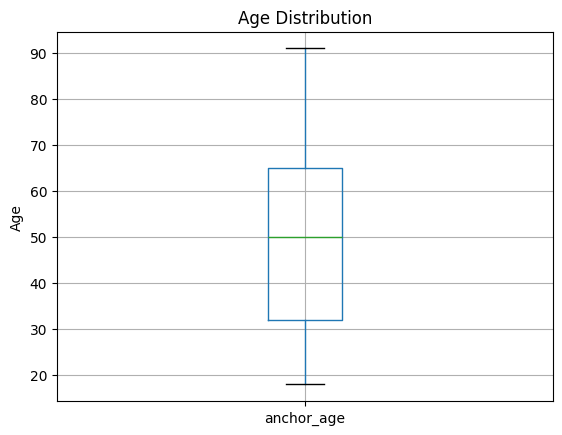

In [ ]:
#create box plot to represent age distribution
final_df_no_duplicates.boxplot(column=['anchor_age'])
plt.title('Age Distribution')
plt.ylabel('Age')
plt.show()

gender
F    111553
M     94132
Name: count, dtype: int64


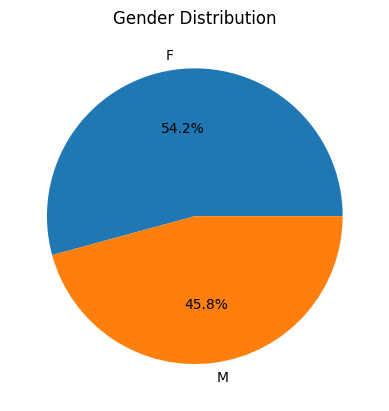

In [ ]:
# gender distribution
print(final_df_no_duplicates['gender'].value_counts())
# create a pie chart with title
plt.pie(final_df_no_duplicates['gender'].value_counts(), labels=final_df_no_duplicates['gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [ ]:
# Race distribution
print(final_df_no_duplicates['race_consolidated'].value_counts())

race_consolidated
White                    118858
Black                     46505
Hispanic/Latino           16720
Other/Unknown             13023
Asian                      9840
Native and Indigenous       739
Name: count, dtype: int64


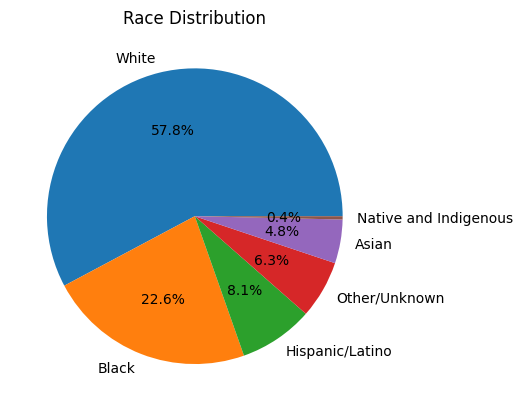

In [ ]:
# create a pie chart for race distribution
plt.pie(final_df_no_duplicates['race_consolidated'].value_counts(), labels=final_df_no_duplicates['race_consolidated'].value_counts().index, autopct='%1.1f%%')
plt.title('Race Distribution')
plt.show()

In [ ]:
# insurance distribution
print(final_df_no_duplicates['insurance'].value_counts())
print(final_df_no_duplicates['insurance'].value_counts() / len(final_df_no_duplicates))

insurance
Medicare     115497
Private       45869
Medicaid      40214
Other          4025
No charge        80
Name: count, dtype: int64
insurance
Medicare     0.561524
Private      0.223006
Medicaid     0.195513
Other        0.019569
No charge    0.000389
Name: count, dtype: float64


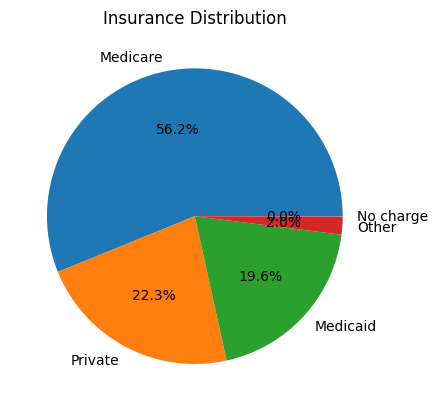

In [ ]:
# pie chart for insurance
plt.pie(final_df_no_duplicates['insurance'].value_counts(), labels=final_df_no_duplicates['insurance'].value_counts().index, autopct='%1.1f%%')
plt.title('Insurance Distribution')
plt.show()

In [ ]:
# calculate rate of insurance types
final_df['insurance'].value_counts() / len(final_df)

,count
insurance,
Medicare,0.585445
Medicaid,0.211346
Private,0.185233
Other,0.017703
No charge,0.000273


In [ ]:
# How many languages
print(f"Number of unique languages: {final_df_no_duplicates['language'].nunique()}")

Number of unique languages: 25


In [ ]:
# language distribution
print(final_df_no_duplicates['language'].value_counts())
print(final_df_no_duplicates['language'].value_counts() / len(final_df_no_duplicates))

language
English                   188165
Spanish                     6620
Chinese                     2419
Russian                     2275
Kabuverdianu                1919
Portuguese                   825
Haitian                      799
Other                        430
Vietnamese                   271
Modern Greek (1453-)         258
American Sign Language       250
Italian                      239
Arabic                       216
Persian                      200
Amharic                      116
Korean                       103
Polish                        97
Thai                          91
Somali                        87
French                        79
Bengali                       68
Hindi                         49
Japanese                      48
Khmer                         36
Armenian                      25
Name: count, dtype: int64
language
English                   0.914821
Spanish                   0.032185
Chinese                   0.011761
Russian                   

In [ ]:
# marital status
print(final_df_no_duplicates['marital_status'].value_counts())
print(final_df_no_duplicates['marital_status'].value_counts() / len(final_df_no_duplicates))

marital_status
SINGLE      122983
MARRIED      56049
WIDOWED      14461
DIVORCED     12192
Name: count, dtype: int64
marital_status
SINGLE      0.597919
MARRIED     0.272499
WIDOWED     0.070307
DIVORCED    0.059275
Name: count, dtype: float64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

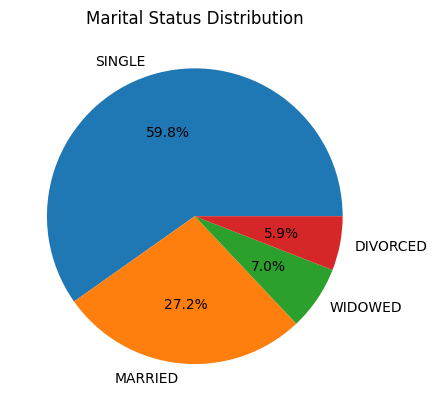

In [ ]:
# Pie chart for marital status
plt.pie(final_df_no_duplicates['marital_status'].value_counts(), labels=final_df_no_duplicates['marital_status'].value_counts().index, autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt

In [ ]:
# how many chief complaints
print(f"Number of unique chief complaints: {final_df_no_duplicates['chief_complaint_category'].nunique()}")

Number of unique chief complaints: 19


In [ ]:
# chief complaint distribution
print(final_df_no_duplicates['chief_complaint_category'].value_counts())
print(final_df_no_duplicates['chief_complaint_category'].value_counts() / len(final_df_no_duplicates))

chief_complaint_category
Pain/Discomfort        90390
Other                  59853
Trauma                 13661
Shortness of Breath     9466
Dizziness/Syncope       7347
Mental Health           6206
Infectious Disease      4420
Respiratory             3298
Heart Disease           1808
Dermatological          1588
Gastrointestinal        1585
Neurological            1349
OBGYN/Pregnancy         1341
Allergy                 1158
Renal disease           1143
Drug Abuse               771
Flu/Pneumonia            251
Chest Pain                41
Abdominal Pain             9
Name: count, dtype: int64
chief_complaint_category
Pain/Discomfort        0.439458
Other                  0.290994
Trauma                 0.066417
Shortness of Breath    0.046022
Dizziness/Syncope      0.035720
Mental Health          0.030172
Infectious Disease     0.021489
Respiratory            0.016034
Heart Disease          0.008790
Dermatological         0.007721
Gastrointestinal       0.007706
Neurological         

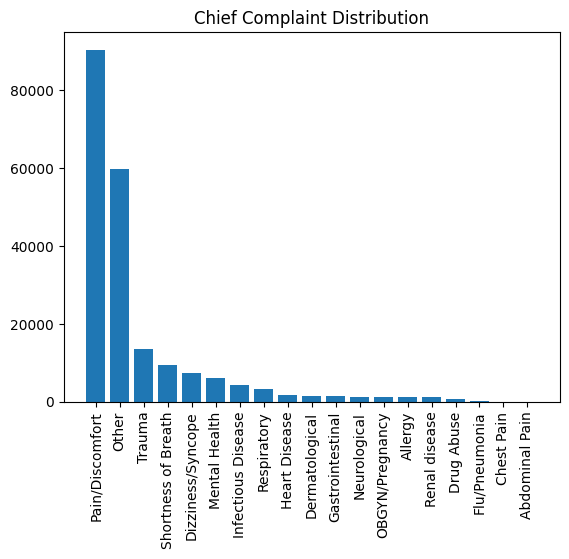

In [ ]:
# bar chart for chief complaint with verticl xticks
plt.bar(final_df_no_duplicates['chief_complaint_category'].value_counts().index, final_df_no_duplicates['chief_complaint_category'].value_counts())
plt.title('Chief Complaint Distribution')
plt.xticks(rotation=90)
plt.show()

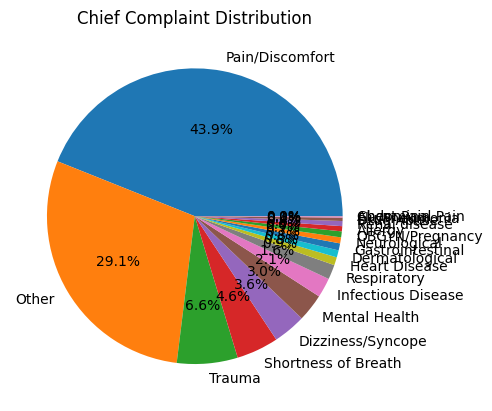

In [ ]:
# pie chart for chief complaint
plt.pie(final_df_no_duplicates['chief_complaint_category'].value_counts(), labels=final_df_no_duplicates['chief_complaint_category'].value_counts().index, autopct='%1.1f%%')
plt.title('Chief Complaint Distribution')
plt.show()

In [ ]:
# acuity distribution
print(final_df_no_duplicates['acuity'].value_counts())
print(final_df_no_duplicates['acuity'].value_counts() / len(final_df_no_duplicates))

acuity
3.0    112784
2.0     72856
4.0     14119
1.0      5470
5.0       456
Name: count, dtype: int64
acuity
3.0    0.548334
2.0    0.354212
4.0    0.068644
1.0    0.026594
5.0    0.002217
Name: count, dtype: float64


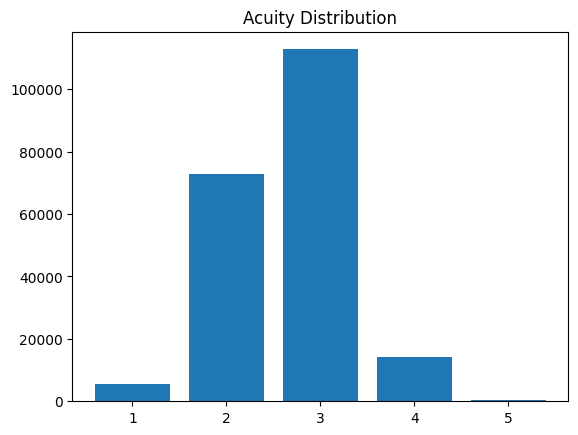

In [ ]:
# bar chart for acuity distribution
plt.bar(final_df_no_duplicates['acuity'].value_counts().index, final_df_no_duplicates['acuity'].value_counts())
plt.title('Acuity Distribution')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# how many pain levels
print(f"Number of unique pain levels: {final_df_no_duplicates['pain'].nunique()}")

Number of unique pain levels: 445


In [ ]:
# Pain level distribution
print(final_df_no_duplicates['pain'].value_counts())
print(final_df_no_duplicates['pain'].value_counts() / len(final_df_no_duplicates))

pain
0                  75082
8                  20885
10                 19958
7                  15209
5                  15197
                   ...  
0-6                    1
tight                  1
lots                   1
0sent  for  lab        1
2-10                   1
Name: count, Length: 445, dtype: int64
pain
0                  0.365034
8                  0.101539
10                 0.097032
7                  0.073943
5                  0.073885
                     ...   
0-6                0.000005
tight              0.000005
lots               0.000005
0sent  for  lab    0.000005
2-10               0.000005
Name: count, Length: 445, dtype: float64


Drop pain from features.

In [ ]:
# arrival transportation distribution
print(final_df_no_duplicates['arrival_transport'].value_counts())
print(final_df_no_duplicates['arrival_transport'].value_counts() / len(final_df_no_duplicates))

arrival_transport
WALK IN       122698
AMBULANCE      75898
UNKNOWN         6517
OTHER            533
HELICOPTER        39
Name: count, dtype: int64
arrival_transport
WALK IN       0.596534
AMBULANCE     0.369001
UNKNOWN       0.031684
OTHER         0.002591
HELICOPTER    0.000190
Name: count, dtype: float64


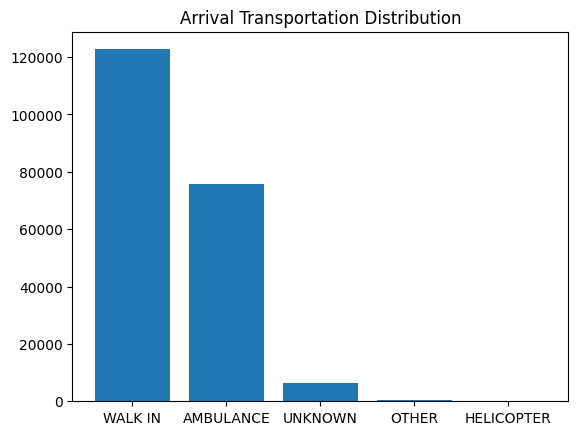

In [ ]:
# bar chart for arrival transportation
plt.bar(final_df_no_duplicates['arrival_transport'].value_counts().index, final_df_no_duplicates['arrival_transport'].value_counts())
plt.title('Arrival Transportation Distribution')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# disposition distribution
print(final_df_no_duplicates['disposition'].value_counts())
print(final_df_no_duplicates['disposition'].value_counts() / len(final_df_no_duplicates))

disposition
HOME                           117678
ADMITTED                        74625
TRANSFER                         4084
LEFT WITHOUT BEING SEEN          3669
ELOPED                           3205
OTHER                            1253
LEFT AGAINST MEDICAL ADVICE      1141
EXPIRED                            30
Name: count, dtype: int64
disposition
HOME                           0.572127
ADMITTED                       0.362812
TRANSFER                       0.019856
LEFT WITHOUT BEING SEEN        0.017838
ELOPED                         0.015582
OTHER                          0.006092
LEFT AGAINST MEDICAL ADVICE    0.005547
EXPIRED                        0.000146
Name: count, dtype: float64


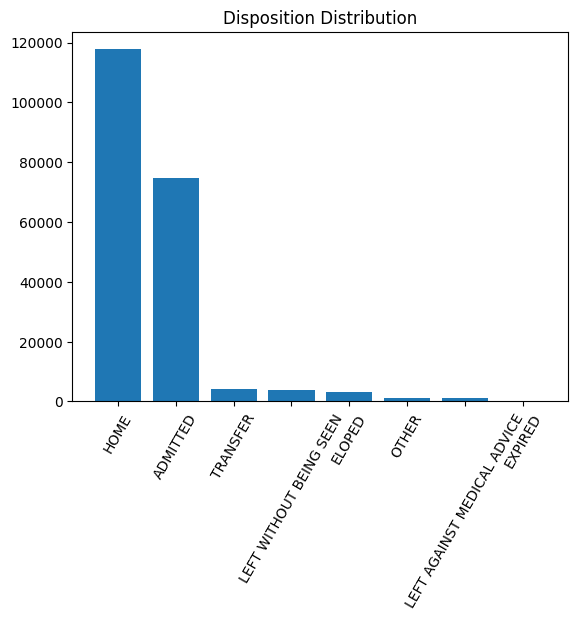

In [ ]:
# bar chart for disposition
plt.bar(final_df_no_duplicates['disposition'].value_counts().index, final_df_no_duplicates['disposition'].value_counts())
plt.title('Disposition Distribution')
plt.xticks(rotation=60)
plt.show()

**End of Exploratory Analysis **